### *Reading the libraries*

In [7]:
import os
import os.path
import random
from operator import add
from datetime import datetime, date, timedelta

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [8]:
import ema_workbench

### *Seting up the display extent*

In [9]:
pd.set_option('display.max_columns',69)
pd.set_option('display.max_rows',138)

## Step 1: Setting Up Climate Scenarios (CH2018, and Random Scenarios)

In [10]:
def is_leap(year):
    """ return true for leap years, False for non leap years """
    return year % 4 == 0 and ( year % 100 != 0 or year % 400 == 0)

def chunks(lst, n):
    """Yield successive n-sized chunks from lst."""
    for i in range(0, len(lst), n):
        yield lst[i:i + n]

### S1.1. *Function that pruduces new climate (precipitation) realization*

In [11]:
def random_pcp(dfpcp, FirstYear, LastYear, ScenarioNumbers, RCPNames, Xfactor1):
    
    #outFileName = OutFileName
    dfpcpCol = dfpcp.columns
    #sceNum = len(dfCol)

    sceNum = ScenarioNumbers
    firstYear = FirstYear
    lastYear = LastYear
    simLen = lastYear - firstYear + 1

    from random import shuffle
    #a = []
    #for x in range(simLen): 
        #randomInd = [z for z in range(sceNum)]
        #shuffle(randomInd)
        #a.append(randomInd)
        
        
    a = []
    for i in range(simLen): 
        randomInd = [z for z in range(sceNum)]
        #x = [[i] for i in range(10)] 
        for x in range(int(round(Xfactor1))):
            shuffle(randomInd)
        a.append(randomInd)
    
    
        
    RCP = RCPNames
    columnsDfpcp = ['sc_' + RCP + str(k) for k in range(1, sceNum+1,1)] 
    c = [[19810101 for p in range(sceNum)]]
    #df1 = 'df' + str(outDFNumber)
    df1pcp = pd.DataFrame(c, columns =columnsDfpcp)
    #df1.to_csv('SAeidVaghefimodified1111222.csv', index = False)

    c.clear()

    i = 0
    p = 1
    for m in range(firstYear, lastYear + 1, 1):
        if is_leap(m):
            for j in range(((m - firstYear)*365+p) , ((m - firstYear)*365+367+p-1), 1):
                c.append(dfpcp[dfpcpCol[a[i]]].iloc[j].values) 
            i += 1 # counter i; equal to simulation length (simLen)
            p += 1

        else:
            for j in range(((m - firstYear)*365+p), ((m - firstYear)*365+366+p-1), 1):
                c.append(dfpcp[dfpcpCol[a[i]]].iloc[j].values) 
            i += 1
                
        #print(m) # this line show the progress of the work by typing the years of simulation

        dfnewpcp = 'df' + str(m)
        dfnewpcp = pd.DataFrame(c, columns =columnsDfpcp)
        c.clear()
        df1pcp = df1pcp.append(dfnewpcp, ignore_index=True)
        
    return df1pcp

### S1.2. *Function that pruduces new climate (temperature) realization*

In [12]:
def random_tmp(dftmp, FirstYear, LastYear, ScenarioNumbers, RCPNames, Xfactor1):

    #dfCol = df.columns
    #sceNum = len(dfCol) // 2
    sceNum = ScenarioNumbers
    firstYear = FirstYear
    lastYear = LastYear
    simLen = lastYear - firstYear + 1

    dftmpColMax = dftmp.columns[[i for i in range(0, sceNum*2, 2)]]
    dftmpColMin = dftmp.columns[[i for i in range(1, sceNum*2, 2)]]

    ## yek list be toole 119 ke dakhelesh list haye 68 ta ee darim be soorate random
    from random import shuffle
    #a = []
    #for i in range(simLen): 
        #randomInd = [j for j in range(sceNum)]
        #x = [[i] for i in range(10)] 
        #shuffle(randomInd)
        #a.append(randomInd)
        
    
    a = []
    for i in range(simLen): 
        randomInd = [j for j in range(sceNum)]
        #x = [[i] for i in range(10)] 
        for x in range(int(round(Xfactor1))):
            shuffle(randomInd)
        a.append(randomInd)
    
        
    #print('end!')

    cT = []
    RCP = RCPNames
    columnsDfOdd = ['sc_' + RCP + str(k)  for k in range(1, sceNum+1,1)] 
    columnsDfEven = [""] * sceNum

    columnsDftmp = []
    #colOdd = ['Scr_' + str(i) for i in range(1, sceNum+1, 1)]
    #colEven = ['' for i in range(1, sceNum+1,1)]

    for i in range (sceNum):
        columnsDftmp.append(columnsDfOdd[i])
        columnsDftmp.append(columnsDfEven[i])


    #### OR:
    #columnsDf = ["Sr", ""] * sceNum
    df1tmp = pd.DataFrame(cT, columns =columnsDftmp)
    #df1.to_csv("rrrrrrrrmodified1111222.csv", index = False)


    cMax = [[19810101 for p in range(sceNum)]]
    cMin = [["" for p in range(sceNum)]]
    i = 0
    p = 1
    for m in range(firstYear, lastYear + 1, 1):
        if is_leap(m):
            for j in range(((m - firstYear)*365+p) , ((m - firstYear)*365+367+p-1), 1):
                cMax.append(dftmp[dftmpColMax[a[i]]].iloc[j].values)
                cMin.append(dftmp[dftmpColMin[a[i]]].iloc[j].values) 
    
            i += 1

        else:
            for j in range(((m - firstYear)*365+p), ((m - firstYear)*365+366+p-1), 1):
                cMax.append(dftmp[dftmpColMax[a[i]]].iloc[j].values)
                cMin.append(dftmp[dftmpColMin[a[i]]].iloc[j].values)

            i += 1

        c = []
        for y in range(0, len(cMax), 1): # the length of simulation years
            for z in range(sceNum): # range(4)
                c.append(cMax[y][z])
                c.append(cMin[y][z])

        cMax.clear()
        cMin.clear()

        cMain = []
        cMain = list(chunks(c, sceNum * 2))
        #print(m) # this line show the progress of the work by typing the years of simulation

    ### Should be checked

        dfnewtmp = 'dftmp' + str(m)
        #columnsDf = ["Sr", ""]*sceNum
        #columnsDf = [['sc_' + str(k), ""] for k in range(1, sceNum+1,1)] 
        dfnewtmp = pd.DataFrame(cMain, columns =columnsDftmp)
        c.clear()
        df1tmp = df1tmp.append(dfnewtmp, ignore_index=True)
        
    return df1tmp

### S1.3. *Function that calls the random_pcp and random_tmp for all stations of a Ski resort*

In [13]:
def randomness_pcp_tmp(fnames, Xfactor1):
    for f in fnames:
        if 'p.csv' in f:
            print('Writing pcp files started!')
            #df = pd.read_csv('47-0625000_8-6666667p.csv')
            dfpcp = pd.read_csv(f)


            filt1 = dfpcp.columns.str.contains('RCP26|_26_') #12
            filt2 = dfpcp.columns.str.contains('RCP45|_45_') #25
            filt3 = dfpcp.columns.str.contains('RCP85|_85_') #31

            dfpcpRCP26 = dfpcp.loc[:, filt1]
            dfpcpRCP45 = dfpcp.loc[:, filt2]
            dfpcpRCP85 = dfpcp.loc[:, filt3]

            dfpcpRCP26_n = random_pcp(dfpcpRCP26, 1981, 2099, 12, '26_', Xfactor1)
            dfpcpRCP45_n = random_pcp(dfpcpRCP45, 1981, 2099, 25, '45_', Xfactor1)
            dfpcpRCP85_n = random_pcp(dfpcpRCP85, 1981, 2099, 31, '85_', Xfactor1)


            result = pd.concat([dfpcpRCP26_n, dfpcpRCP45_n, dfpcpRCP85_n], axis=1, sort=False)
            #result.to_csv('47-0625000_8-6666667p_n1.csv', index = False)


            #newName = 'n_'+ f
            newName = f
            #filepath = os.path.join(os.getcwd(), newName)
            root = os.getcwd()
            
            '''This part makes a new dir for outouts''' ## should be cooment out later
            #if os.path.isdir(os.path.join(root, 'Outputs_randomness')):
                #pass
            #else: os.mkdir(os.path.join(root, 'Outputs_randomness'))

            #outfolder = os.path.join(os.getcwd(), 'Outputs_randomness')
            outfolder =os.path.join(os.getcwd()) # we want the results to be over written

            filepath = os.path.join(outfolder, newName)

            result.to_csv(filepath, index = False)
            print('End of writing pcp files!')
            #print("--- %s seconds ---" % (time.time() - start_time))


        elif 't.csv' in f:
            print('Writing tmp files started!')
            dftmp = pd.read_csv(f)
            dftmpCol = list(dftmp.columns)

            filt1_max = [dftmpCol.index(s) for s in dftmpCol if ("_26_") in s or ("RCP26") in s]
            filt2_max = [dftmpCol.index(s) for s in dftmpCol if ("_45_") in s or ("RCP45") in s]
            filt3_max = [dftmpCol.index(s) for s in dftmpCol if ("_85_") in s or ("RCP85") in s]

            aOnefilt1= [1]*len(filt1_max)
            aOnefilt2= [1]*len(filt2_max)
            aOnefilt3= [1]*len(filt3_max)

            filt1_min = list(map(add, filt1_max, aOnefilt1)) # 
            filt2_min = list(map(add, filt2_max, aOnefilt2))
            filt3_min = list(map(add, filt3_max, aOnefilt3))

            filt1Tot = []
            for i in range(len(filt1_max)):
                filt1Tot.append(filt1_max[i])
                filt1Tot.append(filt1_min[i])

            filt2Tot = []
            for j in range(len(filt2_max)):
                filt2Tot.append(filt2_max[j])
                filt2Tot.append(filt2_min[j])

            filt3Tot = []
            for k in range(len(filt3_max)):
                filt3Tot.append(filt3_max[k])
                filt3Tot.append(filt3_min[k])

            dftmpRCP26 = dftmp[dftmp.columns[filt1Tot]]
            dftmpRCP45 = dftmp[dftmp.columns[filt2Tot]]
            dftmpRCP85 = dftmp[dftmp.columns[filt3Tot]]

            dftmpRCP26_n = random_tmp (dftmpRCP26, 1981, 2099, 12, '26_', Xfactor1)
            dftmpRCP45_n = random_tmp (dftmpRCP45, 1981, 2099, 25, '45_', Xfactor1)
            dftmpRCP85_n = random_tmp (dftmpRCP85, 1981, 2099, 31, '85_', Xfactor1)

            result = pd.concat([dftmpRCP26_n, dftmpRCP45_n, dftmpRCP85_n], axis=1, sort=False)

            #ewName = 'n'+f
            #ilepath = os.path.join(os.environ.get('HOME'), newName)
            #esult.to_csv(filepath, index = False)

            #newName = 'n_'+ f
            newName = f
            #filepath = os.path.join(os.getcwd(), newName)

            #outfolder =os.path.join(os.getcwd(), 'Outputs_randomness')
            outfolder =os.path.join(os.getcwd()) # we want the results to be over written
            
            filepath = os.path.join(outfolder, newName)
            result.to_csv(filepath, index = False)

            print('End of writing tmp files')

        else :
            pass

## Step 2: Function for initiating the main dictionary of climate stations

In [14]:
def create_dic(a):
    '''Function: creating a dictionary for each climate station'''
    
    a = {}
    keys = ['fM', 'iPot', 'rSnow', 'dSnow', 'cPrec', 'dP', 'elev', 'lat', 'long', 'fileName']
    a = {key: None for key in keys}
    return a

def initialize_input_dict (mainFolderSki):
    ''' This function returns a dictionary , and addresses of 4 folders'''
    
    
    '''Step 1''' 
    rootFolder = mainFolderSki
    inputFolder = os.path.join(rootFolder,'input')
    ablationFolder = os.path.join(inputFolder, 'Ablation')
    accumulationFolder = os.path.join(inputFolder, 'Accumulation')
    climate_ref_Folder = os.path.join(inputFolder, 'Climate_ref')
    
    
    '''Step 2: Reading all files names inside the Ablation, Accumulation, and Climate folders'''  
    ablationFiles = []
    for filename in os.walk(ablationFolder):
        ablationFiles = filename[2]
    
    accumulationFiles = list()
    for filename in os.walk(accumulationFolder):
        accumulationFiles = filename[2]

    climate_ref_Files = list()
    for filename in os.walk(climate_ref_Folder):
        climate_ref_Files = filename[2]
        
        
    '''Step 3: Reading files inside ablation folder '''
    os.chdir(ablationFolder)
    with open(ablationFiles[0], 'r') as file:
        FM1 = file.read()
    with open(ablationFiles[1], 'r') as file:
        Ipot1 = file.read()
    with open(ablationFiles[2], 'r') as file:
        Rsnow1 = file.read()
        
        
    '''Step 4: Reading the lines of files inside ablation folder'''
    FM1 = FM1.replace('\n', '\t')
    FM1 = FM1.split('\t')
    Ipot1 = Ipot1.replace('\n', '\t').split('\t')
    Rsnow1 = Rsnow1.replace('\n', '\t').split('\t')
        
        
    '''Step 5: Reading the lines of files inside accumulation folder''' 
    os.chdir(accumulationFolder)
    
    with open(accumulationFiles[0], 'r') as file:
        cPrec = file.read()
    with open(accumulationFiles[1], 'r') as file:
        dSnow1 = file.read()
    
    cPrec = cPrec.replace('\n', '\t')
    cPrec = cPrec.split('\t')
    dSnow1 = dSnow1.replace('\n', '\t').split('\t')
    
    
    '''Step 6: Reading the lines of files inside climate folder''' 
    os.chdir(climate_ref_Folder)
    
    with open('pcp.txt', 'r') as file:
        pcpData = file.read()
    with open('tmp.txt', 'r') as file:
        tmpData = file.read()
        
    pcpData = pcpData.split('\n')
    
    for i in range(len(pcpData)):
        pcpData[i] = pcpData[i].split(',')
        
        
    '''Step 7: Initialazing the input dictionary of climate stations which holds the information of accumulation
     and ablation, and etc of the stations''' 
    nameStn = []
    for file in climate_ref_Files:
        if 'p.csv' in file:
            #nameStn.append('n_' + file[-25: -5])
            nameStn.append(file[-25: -5])

    stnDicts = []
    for i in range(len(nameStn)):
        stnDicts.append(create_dic(nameStn[i]))
    
    
    '''Step 8: Assigning the file names to the dictionary'''
    for i in range (len(nameStn)):
        stnDicts[i]['fileName'] = nameStn[i]

    
    '''Step 9: Assigning the accumulation and ablation values'''
    for stnDict in stnDicts:
        for i, element in enumerate(FM1):
            if element == stnDict['fileName'][:]:
            #if element == stnDict['fileName'][2:]:
                stnDict['fM'] = FM1[i+1]
                
        for i, element in enumerate(Ipot1):
            if element == stnDict['fileName'][:]:
            #if element == stnDict['fileName'][2:]:
                stnDict['iPot'] = Ipot1[i+1]

        for i, element in enumerate(Rsnow1):
            if element == stnDict['fileName'][:]:
            #if element == stnDict['fileName'][2:]:  
                stnDict['rSnow'] = Rsnow1[i+1]

        for i, element in enumerate(dSnow1):
            if element == stnDict['fileName'][:]:
            #if element == stnDict['fileName'][2:]:
                stnDict['dSnow'] = dSnow1[i+1]

        for i, element in enumerate(cPrec):
            stnDict['cPrec'] = cPrec[1]
            stnDict['dP'] = cPrec[3]
            
    '''Step 10: Assigning the elevation, Lat and long to the dictionaries'''
    for i in range(len(stnDicts)):
        for j in range(1, len(pcpData)):
            
            #if pcpData[j][1][2:-1] == stnDicts[i]['fileName'][2:]:
            if pcpData[j][1][:-1] == stnDicts[i]['fileName'][:]:
                stnDicts[i]['lat']= pcpData[j][2]
                stnDicts[i]['long']= pcpData[j][3]
                stnDicts[i]['elev']= pcpData[j][4]
                
    return stnDicts, inputFolder, ablationFolder, accumulationFolder, climate_ref_Folder

## Step 3: Main Snow Model

#### S3.1 *Initializiing the main dictionary for a case study*

In [15]:
caseStudyStns = {}
inputFolder = ''
ablationFolder = ''
accumulationFolder = ''
climateFolder = ''
climateFolder1 = ''
climateFolder2 = ''
#root = 'C:/Users/ashrafse/SA_2/snowModelUZH/case2_Atzmaening'
#root = 'C:/Users/ashrafse/SA_2/snowModelUZH/case6_davos_elevations'
#root = r'C:\Users\ashrafse\SA_2\snowModelUZH\case3_hoch-ybrig_v3_2'
root = r'C:\Saeid\Prj100\SA_2\snowModelUZH\case3_hoch-ybrig_v3_2'

## calling the function with multiple return values
caseStudyStns, inputFolder, ablationFolder, accumulationFolder, climateFolder = initialize_input_dict(root)

#### S3.2 *Check if we have initialized correctly*

In [16]:
climateFolder

'C:\\Saeid\\Prj100\\SA_2\\snowModelUZH\\case3_hoch-ybrig_v3_2\\input\\Climate_ref'

In [17]:
caseStudyStns

[{'fM': '1.012',
  'iPot': '1000',
  'rSnow': '0.5',
  'dSnow': '0.5',
  'cPrec': '0',
  'dP': '0',
  'elev': '1755',
  'lat': '47.00',
  'long': '8.7708333',
  'fileName': '47-0000000_8-7708333'}]

In [18]:
caseStudyStns[0].get("fM")

'1.012'

#### defing the X variables which control modeling (hyper parameter)

In [19]:
X2fM = caseStudyStns[0].get("fM") # change 0 to i for all stations
X3iPot = caseStudyStns[0].get("iPot")
X4rSnow =  caseStudyStns[0].get("rSnow")

In [20]:
print(X2fM)
print(X3iPot)
print(X4rSnow)

1.012
1000
0.5


#### S3.3 *Function that runs the main model*

In [21]:
## 1st column as index: makaing date from 01 01 1981 to 2099 12 31
from datetime import timedelta, date

def daterange(start_date, end_date):
    for n in range(int ((end_date - start_date ).days + 1)):
        yield start_date + timedelta(n)

In [22]:
### 
def policy_release1(x1SnowThershold):
    return x1SnowThershold


### OR Let's make this function in a more OOP way:
class Policy_Ski:
    def __init__(self, x1SnowThershold):
        self.x1SnowThershold = x1SnowThershold
        
    def policy_release2(self):
        return(self.x1SnowThershold)
    
    def policy_release3(self):
        ''' this function should make a matrix of evaluation fot the condition of 100 day ay minimum condition'''
        pass

In [23]:
class Economic_Model_Ski:
    def __init__(self, xCostDay, xRevenueDay):
        self.costDayFixed = xCostDay
        self.revenueDayFixed = xRevenueDay
        
    def economic_costDay(self):
        return(self.costDayFixed)
    
    def economic_revenueDay(self):
        return(self.revenueDayFixed)

In [24]:
class RCP_Model:
    def __init__(self, xRCP, xClimateModel):
        self.input1 = round(xRCP)
        self.input2 = xClimateModel  
        
    def rcpGenerator(self):
        if self.input1 == 1:
            RCP = str(2.6)
            rcpInt = 1
        if self.input1 == 2:
            RCP = str(4.5)
            rcpInt = 2
        if self.input1 == 3:
            RCP = str(8.5)
            rcpInt = 3
        return(RCP, rcpInt)

    
    def climateModel(self):
        a, b = RCP_Model.rcpGenerator(self)
        
        if b == 1:
            climateModel = round(self.input2*11)
            
        elif b == 2:
            climateModel = 11 + max(1,round(self.input2*25))
            
        else:
            climateModel = 36 + max(1, round(self.input2*31))
            
        return (int(climateModel))

In [25]:
os.chdir(climateFolder)
fnames = os.listdir()
print(fnames)

['47-0000000_8-7708333p.csv', '47-0000000_8-7708333t.csv', 'pcp.txt', 'tmp.txt']


In [28]:
'''RCP and Climate Model Controler'''
#rcp_Model = RCP_Model(1.545008,0.5991817)
rcp_Model2 = RCP_Model(0.545008,0.00909991817)
RCP11, intRCP11 = rcp_Model2.rcpGenerator()
climateModel11 = rcp_Model2.climateModel()

In [29]:
print(RCP11)
print(intRCP11)
print(climateModel11)

2.6
1
0


In [30]:
def snow_Model (xRCP=None, xClimateModel=None, Xfactor1 = None,  X2fM = None, X3iPot = None, X4rSnow = None, 
                X5temp = None, X6tempArt = None, xCostDay = None, xRevenueDay = None, x1SnowThershold = None,
                xGoodDays = None):
    '''' This function controls the Ski resort model'''
    
    
    ''' VERY IMPORTANT --- Controling the randomness --- VERY IMPORTANT'''
    
    #if 0 <= xClimateRandomness <= 68 :
     #   os.chdir(climateFolder)
      #  fnames = os.listdir()
    #elif 69 <= xClimateRandomness <= 138 :
     #   os.chdir(climateFolder1)
      #  fnames = os.listdir()
    #else: 
     #   os.chdir(climateFolder2)
      #  fnames = os.listdir()
        
    os.chdir(climateFolder)
    fnames = os.listdir()
    #randomness_pcp_tmp(fnames, Xfactor1)
    
    print('Snow_Model: Matching the station names values with CSV files!')   
    '''Matching the station names values in the dictionary of stations with CSV files in Climate folder of the case Study'''
    pcpCaseStudy = []
    tmpCaseStudy = []

    for i in range(len(caseStudyStns)):
        pcpCaseStudy.append(os.path.join(climateFolder, caseStudyStns[i]['fileName'] + 'p.csv'))
        tmpCaseStudy.append(os.path.join(climateFolder, caseStudyStns[i]['fileName'] + 't.csv'))
    

    print('Snow_Model: Building a database for each csv file (tmp and pcp)!')
    
    '''Step 6: building a database for each precipitation and temperature file in Climate folder and saving them in a list'''
    '''6.1 reading the csv files as databases'''
    dfpcp = [None for _ in range(len(pcpCaseStudy))]
    dftmp = [None for _ in range(len(tmpCaseStudy))]
    for i in range(len(pcpCaseStudy)):
        dfpcp[i] = pd.read_csv(pcpCaseStudy[i])
        dftmp[i] = pd.read_csv(tmpCaseStudy[i])
        
    '''6.2 making a header for output files'''
    dfpcpCol = dfpcp[0].columns
    dftmpCol = dftmp[0].columns
    
    '''6.3 defining the length of simulations and scenarios'''
    scenariosLength = len(dfpcpCol)
    simulationLength = len(dftmp[0][dftmpCol[0]]) - 1
        
    
    '''Reading the beginning and end of the simulation''' 
    start_date = date(1981, 1, 1)
    end_date = date(2099, 12, 31)
    dateList = []
    for single_date in daterange(start_date, end_date):
        dateList.append(single_date.strftime("%m/%d/%Y"))

    seasonList = []
    for n in range (1981, 2100, 1):
        seasonList.append(str(n))
    
    
    print('Snow_Model: Part 1 Running the model, daily output!')

    '''################################ PART1 ################################'''
    '''Running the model for each climate station:'''
    
    for k in range(len(caseStudyStns)):
        
        '''making a header for output files'''
        dfpcpCol = dfpcp[k].columns
        dftmpCol = dftmp[k].columns

        #X2fM = caseStudyStns[k].get("fM") # change 0 to i for all stations
        #X3iPot = caseStudyStns[k].get("iPot")
        #X4rSnow =  caseStudyStns[k].get("rSnow")
        

        '''defining the length of simulations and scenarios'''
        #scenariosLength = len(dfpcpCol)
        scenariosLength = 1
        simulationLength = len(dftmp[0][dftmpCol[0]]) - 1


        '''declaring the initial arrays'''
        accumulation = [0 for _ in range(simulationLength)]
        ablation =  [0 for _ in range(simulationLength)]
        snowDeposite = [0 for _ in range(simulationLength)]
        total = np.zeros([simulationLength, 3*scenariosLength])
        
        
        '''declaring the new variables for financial analyses and temrature Index for artificial snow making'''
        artSnowCheck = [0 for _ in range(simulationLength)]
        revenue = [0 for _ in range(simulationLength)]
        cost = [0 for _ in range(simulationLength)]
        profit = [0 for _ in range(simulationLength)]
        totalMoney = np.zeros([simulationLength, 4*scenariosLength])


        '''RCP and Climate Model Controler'''
        rcp_Model = RCP_Model(xRCP, xClimateModel)
        RCP, intRCP = rcp_Model.rcpGenerator()
        climateModel = rcp_Model.climateModel()
        
        
        '''Running the model for each climate scenario:'''
        for j in range(climateModel, climateModel + 1, 1):
            
            
        #for j in range(len(dfpcpCol)):
            ## Reading the information and inputs of the first day of simulation
            todayPCP = dfpcp[k][dfpcpCol[j]].iloc[1] if (dfpcp[k][dfpcpCol[j]].iloc[1] != -99) else 0
            todayTMPMAX = round(dftmp[k][dftmpCol[2*j]].iloc[1],2) if(dftmp[k][dftmpCol[2*j]].iloc[1] != -99) else 0
            todayTMPMIN = round(dftmp[k][dftmpCol[2*j+1]].iloc[1],2) if(dftmp[k][dftmpCol[2*j+1]].iloc[1] != -99) else 0
            todayTMPAVE = round((todayTMPMAX+todayTMPMIN)/2,2) if((todayTMPMAX+todayTMPMIN)/2 != -99) else 0

            
            '''Thershold 300 mm
            EMA_workbench_controler for the thershold of good snow condition'''
            #A = policy_release1(x1SnowThershold)
            
            
            policySkiResort = Policy_Ski(x1SnowThershold) ## 300 mm
            snowThershold = policySkiResort.policy_release2()
            
            
            
            '''EMA_workbench_controler for the thershold daily fixed revenue and cost expenses'''
            economyDaySki = Economic_Model_Ski(xCostDay, xRevenueDay) 
            revenueDayFixed = economyDaySki.economic_revenueDay()  # self.revenueDayFixed
            costDayFixed = economyDaySki.economic_costDay()  # self.costDayFixed
            

          
            '''Accumulation for the first day:'''
            if (todayTMPAVE) <= X5temp:
                accumulation[0] = todayPCP *(1 + float(caseStudyStns[k]['cPrec']))*float(caseStudyStns[k]['dSnow'])*(1)

            elif X5temp -1 < (todayTMPAVE) <= X5temp + 1:
                accumulation[0] = todayPCP *(1 + float(caseStudyStns[k]['cPrec']))*float(caseStudyStns[k]['dSnow'])*float((X5temp + 1 -todayTMPAVE)/2)

            else: accumulation[0] = 0


            '''Ablation for the first day:'''
            if todayTMPAVE <= X5temp:
                 ablation[0] = 0
            else: 
                #ablation[0] = (float(caseStudyStns[k]['fM']) + float(caseStudyStns[k]['rSnow'])*float(caseStudyStns[k]['iPot'])*0.001)*float(todayTMPAVE)*(1+0)
                ablation[0] = (float(X2fM) + float(X4rSnow)*float(X3iPot)*0.001)*float(todayTMPAVE)*(1+0)

                
            '''Main mass balance equation for the first day:'''
            snowDeposite[0] = 0 if (0 + accumulation[0] - ablation[0]) < 0 else (0 + accumulation[0] - ablation[0])

            
            '''storing three values in a list for the first day'''
            #total[0,3*j+0] = round((accumulation[0] - ablation[0]), 2)
            #total[0,3*j+1] = round(snowDeposite[0], 2)
            #total[0,3*j+2] = 1 if (total[0,3*j+1] > snowThershold) else total[0,3*j+1] / snowThershold
            
            total[0,0] = round((accumulation[0] - ablation[0]), 2)
            total[0,1] = round(snowDeposite[0], 2)
            total[0,2] = 1 if (total[0,1] > snowThershold) else total[0,1] / snowThershold


            
            '''Check the posiibility of Snow Making'''
            if (todayTMPAVE) <= X6tempArt:
                artSnowCheck[0] = 1
            
            elif X6tempArt < (todayTMPAVE) <= X6tempArt + 2:
                artSnowCheck[0] = 1 * float((X6tempArt + 2 -todayTMPAVE)/2)
                
            else:
                artSnowCheck[0] = 0
                
                
            '''Revenue and financial status'''
            #revenue[0] = round((total[0,3*j+2] * 10), 2)
            revenue[0] = float(round(revenueDayFixed,2)) if (total[0,2] > snowThershold ) else float(round(revenueDayFixed,2))*float((total[0,2] / snowThershold))
            
            '''Cost'''
            #cost[0] = round((revenue[0] * 0.4) , 2)
            #cost[0] = float(round(costDayFixed, 2)) if (total[0,3*j+2] > snowThershold ) else float(round(costDayFixed,2))*float((total[0,3*j+2] / snowThershold)) 
            #cost[0] = float(round(costDayFixed, 2)) if (total[0,3*j+2] > snowThershold else float(round(costDayFixed,2))*float((total[0,3*j+2] / snowThershold))
            cost[0] = float(round(costDayFixed, 2)) if (total[0,2] > snowThershold ) else float(round(costDayFixed,2))*float((total[0,2]*2 / snowThershold))
                                                        
            '''Profit'''
            profit[0] = revenue[0] - cost[0]
            

            '''Storing the artificial snow possibility check and financial situation'''
            #totalMoney[0,1*j+0] = round(100.345, 2)
            totalMoney[0,0] = round(artSnowCheck[0], 2)
            totalMoney[0,1] = round(revenue[0], 2)
            totalMoney[0,2] = round(cost[0], 2)
            totalMoney[0,3] = round(profit[0], 2)
            
            
            '''For the SECOND DAY to the End of Simulation:'''
            i = 0
            for i in range(2, simulationLength + 1, 1):
                '''# precipitation and temperature missing values were handled'''
                todayPCP = dfpcp[k][dfpcpCol[j]].iloc[i] if (dfpcp[k][dfpcpCol[j]].iloc[i] != -99) else 0
                todayTMPMAX = round(dftmp[k][dftmpCol[2*j]].iloc[i],2) if(dftmp[k][dftmpCol[2*j]].iloc[i] != -99) else 0
                todayTMPMIN = round(dftmp[k][dftmpCol[2*j+1]].iloc[i],2) if(dftmp[k][dftmpCol[2*j+1]].iloc[i] != -99) else 0
                todayTMPAVE = round((todayTMPMAX+todayTMPMIN)/2,2) if((todayTMPMAX+todayTMPMIN)/2 != -99) else 0

                '''### Accumulation :'''
                if(todayTMPAVE) <= X5temp:
                    ##
                    accumulation[i-1] = todayPCP *(1 + float(caseStudyStns[k]['cPrec']))*float(caseStudyStns[k]['dSnow'])*(1)

                elif X5temp -1 < (todayTMPAVE) <= X5temp + 1:
                    accumulation[i-1] = todayPCP *(1 + float(caseStudyStns[k]['cPrec']))*float(caseStudyStns[k]['dSnow'])*float((X5temp + 1 -todayTMPAVE)/2)

                else: accumulation[i-1] = 0

                '''### Ablation :'''
                if todayTMPAVE <= X5temp:
                    ablation[i-1] = 0
                else: 
                    #ablation[i-1] = (float(caseStudyStns[k]['fM']) + float(caseStudyStns[k]['rSnow'])*float(caseStudyStns[k]['iPot'])*0.001)*float(todayTMPAVE)*(1+0)
                    ablation[i-1] = (float(X2fM) + float(X4rSnow)*float(X3iPot)*0.001)*float(todayTMPAVE)*(1+0)

                '''### Main mass balance equation for second day to the end of simulation:'''
                snowDeposite[i-1] = 0 if (snowDeposite[i-2] + accumulation[i-1] - ablation[i-1]) < 0 else (snowDeposite[i-2] + accumulation[i-1] - ablation[i-1])


                '''### storing three values in a list''' 
                total[i-1,0] = round((accumulation[i-1] - ablation[i-1]) , 2)
                total[i-1,1] = round(snowDeposite[i-1], 2)
                #total[i-1,3*j+2] = 1 if (total[i-1,3*j+1] > A) else 0
                total[i-1,2] = 1 if (total[i-1,1] > snowThershold) else total[i-1,1] / snowThershold

                
                ## 2020/06/22
                '''Check the posiibility of Snow Making'''
                if (todayTMPAVE) <= X6tempArt:
                    artSnowCheck[i-1] = 1

                elif X6tempArt < (todayTMPAVE) <= X6tempArt + 2:
                    artSnowCheck[i-1] = 1 * float((X6tempArt + 2 -todayTMPAVE)/2)

                else:
                    artSnowCheck[i-1] = 0
                
                
                '''Revenue'''
                #revenue[i-1] = round((total[i-1,3*j+2] * 10), 2)
                revenue[i-1] = float(round(revenueDayFixed,2)) if (total[i-1,2] > snowThershold ) else float(round(revenueDayFixed,2))*float((total[i-1,2] / snowThershold))

                '''Cost'''
                #cost[i-1] = round((revenue[i-1] * 0.4) , 2)
                #cost[i-1] = float(round(costDayFixed, 2)) if (total[i-1,3*j+2] >  snowThershold ) else float(round(costDayFixed,2))*float((total[i-1,3*j+2] /  snowThershold)) 
                #cost[i-1] = float(round(costDayFixed, 2))
                cost[i-1] = float(round(costDayFixed, 2)) if (total[i-1,2] >  snowThershold ) else float(round(costDayFixed,2))*float((total[i-1,2]*2 /  snowThershold)) 
                
                '''Profit'''
                profit[i-1] = revenue[i-1] - cost[i-1]

                
                '''Storing the artificial snow possibility and financial situation'''
                totalMoney[i-1,0] = round(artSnowCheck[i-1], 2)
                totalMoney[i-1,1] = round(revenue[i-1], 2)
                totalMoney[i-1,2] = round(cost[i-1], 2)
                totalMoney[i-1,3] = round(profit[i-1], 2)
                             

        '''Saving the Outputs of total list in a CSV file in a specific path'''

        ## 1st row as the column names:
        
        columnsDF = []
        columnsDF_aerSnowCheck = []
        
        #for col in dfpcpCol[j]:
        #    columnsDF.append('SnowAmount_' + col)
        #    columnsDF.append('TotalSnowAmount_' + col)
        #    columnsDF.append('isOverSnow_' + col)
        #    columnsDF_aerSnowCheck.append('ArtSnowPossibility_' + col)
        #    columnsDF_aerSnowCheck.append('Revenue_' + col)
        #    columnsDF_aerSnowCheck.append('Cost_' + col)
        #    columnsDF_aerSnowCheck.append('Money_' + col)
        
        
        #nameHeader = dfpcpCol[int(xClimateModel)]
        nameHeader = dfpcpCol[climateModel]

        
        columnsDF.append('SnowAmount_' + nameHeader)
        columnsDF.append('TotalSnowAmount_' + nameHeader)
        columnsDF.append('isOverSnow_' + nameHeader)
        columnsDF_aerSnowCheck.append('ArtSnowPossibility_')
        columnsDF_aerSnowCheck.append('Revenue_' + nameHeader)
        columnsDF_aerSnowCheck.append('Cost_' + nameHeader)
        columnsDF_aerSnowCheck.append('Money_' + nameHeader)
         
        
        '''Snow daily'''
        columnsDF0 = ['DATE']
        dfnew0 = pd.DataFrame(dateList, columns = columnsDF0)
        dfnew1 = pd.DataFrame(total, columns = columnsDF)
        df1 = pd.concat([dfnew0, dfnew1], axis=1, sort=False)
        
        '''Money and Artifical Snow'''
        dfnew2 = pd.DataFrame(totalMoney, columns = columnsDF_aerSnowCheck)
        df2 = pd.concat([dfnew0, dfnew2], axis=1, sort=False)
        

        if os.path.isdir(os.path.join(root, 'Outputs_py')):
            pass
        else: os.mkdir(os.path.join(root, 'Outputs_py'))

            
        '''daile Snow Outputs'''
        outfolder =os.path.join(root, 'Outputs_py') 
        outfileName = 'Total_daily_' + caseStudyStns[k]['fileName'] + '.csv'
        outputFile = os.path.join(outfolder, outfileName )
        df1.to_csv(outputFile, index = False)
        
        
        '''Artificial Snow and Financial Outputs'''
        outfileName2 = 'Total_Moneydaily_' + caseStudyStns[k]['fileName'] + '.csv'
        outputFile2 = os.path.join(outfolder, outfileName2)
        df2.to_csv(outputFile2, index = False)
        #return df1, df2
        
        print('End of Part 1 Calculations!')
        
        '''################################ PART2 ################################'''
        '''##### PART 2 seasonal outputs Tipping points and Liklihood of Survival#####'''
        
        print('Snow_Model: Starting Part 2, Running the model, seasonal outputs, reading files!')
        
        #### 2020/06/10 ####
        total_Daily_FilesAll = list()
        total_Daily_Files = []
        
        #### 2020/06/22 ####
        total_Money_Files = []
        
        for filename in os.walk(outfolder):
            total_Daily_FilesAll = filename[2]

        for bIndex in range (len(total_Daily_FilesAll)):        
            if 'Moneydaily_' in total_Daily_FilesAll[bIndex]:
                total_Money_Files.append(total_Daily_FilesAll[bIndex])
            elif 'Total_daily_' in total_Daily_FilesAll[bIndex]:
                total_Daily_Files.append(total_Daily_FilesAll[bIndex])
            else: continue
                
                            
        
        '''##Adding the whole address of directory to the name of total daily snow files'''
        totalFiles = []
        for i in range(len(total_Daily_Files)):
            totalFiles.append(os.path.join(outfolder, total_Daily_Files[i]))
        
                
        '''##Adding the whole address of directory to the name of total daily money files'''
        totalMoneyFiles = []
        for i in range(len(total_Money_Files)):
            totalMoneyFiles.append(os.path.join(outfolder, total_Money_Files[i]))
        
        
        print('Snow Model: Continuing of Part 2, Seasonal Outputs, Performing  Tipping Points Analyses!')
        
        
        ## databases are read here: 
        dfSeason = [ None for _ in range(len(totalFiles))]
        
        ##2020/06/22
        dfSeasonMoney = [ None for _ in range(len(totalMoneyFiles))]
        
        
        ##Here we calcluate seasonal tipping points here
        for i in range(len(totalFiles)):
            dfSeason[i] = pd.read_csv(totalFiles[i], low_memory=False)

            
            start_date = date(1981, 1, 1)
            end_date = date(2099, 12, 31)
            dateList = []
            for single_date in daterange(start_date, end_date):
                dateList.append(single_date.strftime("%m/%d/%Y"))

            start_season = []
            end_season = []

            for pp in range (1981, 2099, 1):
                start_season.append(date(pp, 11, 1))
                end_season.append(date(pp+1, 4, 30))

            df2 = dfSeason[i]
            df2.set_index('DATE', inplace = True)
            df2Col = df2.columns

            df2ColCal = []
            
            for m in range(1):
            #for m in range(68):
                df2ColCal.append(df2Col[3*m+2])

            sumGoodCondition = np.zeros([len(start_season), len(df2ColCal)])
            sumRows = np.zeros(len(df2ColCal))  ### Saeed  2020/06/11


            for j in range(len(df2ColCal)):
                for k in range(len(start_season)):
                #for i in range(3):
                    start_date = start_season[k]
                    end_date = end_season[k]
                        #start_date = date(1981, 1, 2)
                        #end_date = date(1981, 1, 10)
                    for single_date in daterange(start_date, end_date):
                        sumGoodCondition[k,j] += df2[df2ColCal[j]].loc[single_date.strftime("%m/%d/%Y")]
                    sumRows[j] +=  sumGoodCondition[k,j] ### Saeed  2020/06/11
            
            #AveragesumRows = np.average(sumRows/len(df2ColCal))
            AveragesumRows = np.average(sumRows/118)  ## Saeed 2020/07/31
            df3 = pd.DataFrame(sumGoodCondition, columns = df2ColCal)


            firstCol = []
            for o in range (len(seasonList)-1):
                firstCol.append(seasonList[o] +'-' + seasonList[o+1])

            columnsDF1 = ['Season']
            dfnew3 = pd.DataFrame(firstCol, columns = columnsDF1)

            dfFinalSeason = pd.concat([dfnew3, df3], axis=1, sort=False)          
            
            if os.path.isdir(os.path.join(root, 'outSeason')):
                pass
            else: 
                os.mkdir(os.path.join(root, 'outSeason'))
            
            outfileNameSeason = 'season_' + total_Daily_Files[i]
            outFolderSeason = os.path.join(root, 'outSeason')
            outputFileSeason = os.path.join(outFolderSeason, outfileNameSeason)
            
            outFilesFinal = []
            for filename in os.walk(outFolderSeason):
                outFilesFinal = filename[2]
                iii = len(outFilesFinal)
                if os.path.isfile(outputFileSeason):
                    newOutFileNameSeason = outputFileSeason[0 : -4] + '_' + str(iii) + '.csv'
                    dfFinalSeason.to_csv(newOutFileNameSeason, index = False)
                else: 
                    dfFinalSeason.to_csv(outputFileSeason, index = False)
            
            
            
            print('Snow Model: Continuing of Part 2, Seasonal Outputs, Likelihood Analyses!')
            
            df_sum_ch2018 = dfFinalSeason
            ### We transfer the data to a Matrix dfFinalSeason
            df_sum_ch2018_M = df_sum_ch2018.iloc[0: , 1:]
            df_sum_ch2018_Matrix = df_sum_ch2018_M.to_numpy()
            df_sum_ch2018_M_Columns= df_sum_ch2018_M.columns


            ## We initialize the Matrix of Survival
            #reportMatrix = np.zeros((118, 68))
            reportMatrix = np.zeros((118, 1))

            ## We Calculate the Chance of Survival
            xGoodDays_Condiion  = xGoodDays
            for j in range (len(df_sum_ch2018_M_Columns)):
                for iii in range(len(df_sum_ch2018_M[df_sum_ch2018_M_Columns[0]])):
                    if df_sum_ch2018_M[df_sum_ch2018_M_Columns[j]][iii] < xGoodDays:
                        reportMatrix[iii,j] = (df_sum_ch2018_M[df_sum_ch2018_M_Columns[j]][iii] / xGoodDays) * 100
                    else:
                        reportMatrix[iii,j] = 100

                        
            AveragereportMatrix = np.average(reportMatrix/118)
            #we sevae the results in a database
            dfFinalSeasonLikelihood_noFirstCol = pd.DataFrame(reportMatrix, columns = df_sum_ch2018_M_Columns)
            dfFinalSeasonLikelihood = pd.concat([dfnew3, dfFinalSeasonLikelihood_noFirstCol], axis=1, sort=False)

            #make a directory for outputs of part 4
            if os.path.isdir(os.path.join(root, 'outSeason_Likelihood_survival')):
                pass
            else:
                os.mkdir(os.path.join(root, 'outSeason_Likelihood_survival'))

            outfileNameSeasonLikelihood = 'season_Likelihood_' +  total_Daily_Files[i]
            outFolderSeasonLikelihood = os.path.join(root, 'outSeason_Likelihood_survival')
            outputFileSeasonLikelihood = os.path.join(outFolderSeasonLikelihood, outfileNameSeasonLikelihood)

            ####
            outFilesFinalLikelihood = []
            for fname in os.walk(outFolderSeasonLikelihood): 
                outFilesFinalLikelihood = fname[2]
                qq = len(outFilesFinalLikelihood)
                if os.path.isfile(outputFileSeasonLikelihood):
                    newOutFileNameSeasonLikelihood = outputFileSeasonLikelihood[0 : -4] + '_' + str(qq) + '.csv'
                    dfFinalSeasonLikelihood.to_csv(newOutFileNameSeasonLikelihood, index = False)
                else:
                    dfFinalSeasonLikelihood.to_csv(outputFileSeasonLikelihood, index = False)    

        print('End of Part 2 Calculations')
        
        '''################################ PART3 ################################'''
        '''##### PART 3 seasonal outputs for Artificial snow possibility and Economic Model#####'''
        print('PART3: Running the Artificial snow possibility and Economic Model, seasonal outputs analyses!')
        
        dfSeasonMoney = [ None for _ in range(len(totalMoneyFiles))]
        
        
        for i in range(len(totalMoneyFiles)):
            dfSeasonMoney[i] = pd.read_csv(totalMoneyFiles[i], low_memory=False)

            
            start_date = date(1981, 1, 1)
            end_date = date(2099, 12, 31)
            dateList = []
            for single_date in daterange(start_date, end_date):
                dateList.append(single_date.strftime("%m/%d/%Y"))

            start_season = []
            end_season = []

            for pp in range (1981, 2099, 1):
                start_season.append(date(pp, 11, 1))
                end_season.append(date(pp+1, 4, 30))

            df4 = dfSeasonMoney[i]
            df4.set_index('DATE', inplace = True)
            df4Col = df4.columns
            df4ColCal = []   # list columns 
            df4ColCalMoney = [] 
            
            #### Here is the syntax that controls the columns that should be taken to account for cal
            for m in range(1):
                df4ColCal.append(df4Col[4*m+0])
                df4ColCalMoney.append(df4Col[4*m+3])

            sumGoodArtSnow = np.zeros([len(start_season), len(df4ColCal)])
            sumRowsArtSnow = np.zeros(len(df4ColCal))  ### Saeed  2020/06/11
            
            
            sumProfit = np.zeros([len(start_season), len(df4ColCalMoney)])
            sumRowsProfit = np.zeros(len(df4ColCalMoney))
            
            '''Artificial Snow'''
            for j in range(len(df4ColCal)):
                for k in range(len(start_season)):
                
                    start_date = start_season[k]
                    end_date = end_season[k]
                        
                        
                    for single_date in daterange(start_date, end_date):
                        sumGoodArtSnow[k,j] += df4[df4ColCal[j]].loc[single_date.strftime("%m/%d/%Y")]
                        
                        sumProfit[k,j] += df4[df4ColCalMoney[j]].loc[single_date.strftime("%m/%d/%Y")]
                        
                        
                    sumRowsArtSnow[j] +=  sumGoodArtSnow[k,j] ### Saeed  2020/06/22
                    sumRowsProfit[j] += sumProfit[k,j]
            
            
            AveragesumRowsArtSnow = np.average(sumRowsArtSnow/len(df4ColCal))
            AveragesumRowsProfit = np.average(sumRowsProfit/len(df4ColCalMoney))
            
            df5 = pd.DataFrame(sumGoodArtSnow, columns = df4ColCal)
            df6 = pd.DataFrame(sumProfit, columns = df4ColCalMoney)


            firstCol = []
            for o in range (len(seasonList)-1):
                firstCol.append(seasonList[o] +'-' + seasonList[o+1])

            columnsDF2 = ['Season']
            dfnew4 = pd.DataFrame(firstCol, columns = columnsDF2)

            dfFinalSeasonArtSnow = pd.concat([dfnew4, df5], axis=1, sort=False)
            dfFinalSeasonFinancial = pd.concat([dfnew4, df6], axis=1, sort=False)

            
            if os.path.isdir(os.path.join(root, 'outSeasonArt')):
                pass
            else: 
                os.mkdir(os.path.join(root, 'outSeasonArt'))
            
            if os.path.isdir(os.path.join(root, 'outSeasonFinancial')):
                pass
            else: 
                os.mkdir(os.path.join(root, 'outSeasonFinancial'))
                
                
            
            outfileNameSeasonArt = 'season_Art_' + total_Money_Files[i]
            outFolderSeasonArt = os.path.join(root, 'outSeasonArt')
            outputFileSeasonArt = os.path.join(outFolderSeasonArt, outfileNameSeasonArt)
            
            
            outfileNameSeasonMoney = 'season_Financial_' + total_Money_Files[i]
            outFolderSeasonMoney = os.path.join(root, 'outSeasonFinancial')
            outputFileSeasonMoney = os.path.join(outFolderSeasonMoney, outfileNameSeasonMoney)
                
            
            ##### Moshkel injast
            outFilesFinalArt = []
            for filename in os.walk(outFolderSeasonArt):
                outFilesFinalArt = filename[2]
                jjj = len(outFilesFinalArt)
                if os.path.isfile(outputFileSeasonArt):
                    newOutFileNameSeasonArt = outputFileSeasonArt[0 : -4] + '_' + str(jjj) + '.csv'
                    dfFinalSeasonArtSnow.to_csv(newOutFileNameSeasonArt, index = False)
                else: 
                    dfFinalSeasonArtSnow.to_csv(outputFileSeasonArt, index = False)
        
            ####
            outFilesFinalMoney = []
            for fname in os.walk(outFolderSeasonMoney): 
                outFilesFinalMoney = fname[2]
                q = len(outFilesFinalMoney)
                if os.path.isfile(outputFileSeasonMoney):
                    newOutFileNameSeasonMoney = outputFileSeasonMoney[0 : -4] + '_' + str(q) + '.csv'
                    dfFinalSeasonFinancial.to_csv(newOutFileNameSeasonMoney, index = False)
                else:
                    dfFinalSeasonFinancial.to_csv(outputFileSeasonMoney, index = False)
            
            
            print('End of all calculations')
        
        #return df1, outfolder, dfFinalSeason
        #return {'y' : x1 * Xfactor1 * X2}
        return {'y' : AveragesumRows, 'y1' : climateModel, 'y2' : dfpcpCol[climateModel], 'y3' : sumRows,
                'y4' : AveragesumRowsArtSnow, 'y5' : AveragesumRowsProfit  ,'y6' : AveragereportMatrix }

## Step 4: EMA_Workbench connector

In [31]:
'''
Created on 20 dec. 2010

This file illustrated the use the EMA classes for a contrived example
It's main purpose has been to test the parallel processing functionality

.. codeauthor:: jhkwakkel <j.h.kwakkel (at) tudelft (dot) nl>
'''
from __future__ import (absolute_import, print_function, division,
                        unicode_literals)

from ema_workbench import (Model, RealParameter, Constant, ScalarOutcome, ema_logging,
                          perform_experiments, TimeSeriesOutcome, ArrayOutcome)

In [ ]:
import time
start_time = time.time()

if __name__ == '__main__':
    ema_logging.LOG_FORMAT = '[%(name)s/%(levelname)s/%(processName)s] %(message)s'
    ema_logging.log_to_stderr(ema_logging.INFO)

    model = Model('UZHModel', function = snow_Model)  # instantiate the model
    
    
    # specify process model parameters  xRCP=None, xClimateModel=None
    model.uncertainties = [RealParameter("xRCP", 0.51, 3.49),
                           RealParameter("xClimateModel", 0, 1),
                           RealParameter("X2fM", 1.01, 1.61),
                           RealParameter("X3iPot", 900, 1100),                        
                           RealParameter("X5temp", 0, 6.0),
                           RealParameter("X6tempArt", -2.0, -1.0)]
    
    # specify polices
    model.levers = [RealParameter("x1SnowThershold", 200.0, 300.0),
                    RealParameter("xGoodDays", 70.0 , 100.0)]
   

    # specify outcomes
    model.outcomes = [ScalarOutcome('y'),
                      ScalarOutcome('y1'),
                      ArrayOutcome('y3'),
                      ScalarOutcome('y4'),
                      ScalarOutcome('y5'),
                      ScalarOutcome('y6')]
    
    # override some of the defaults of the model
    model.constants = [Constant("Xfactor1", 1.4),
                       Constant("X4rSnow", 0.7),
                       Constant("xCostDay", 6),
                       Constant("xRevenueDay", 10)]
    

    results = perform_experiments(model, 80, 40)
    

print('end!')
training_time = time.time() - start_time

## Simulation time

In [25]:
print("--- %s seconds ---" % (training_time))
print('training time : {} mins and {} seconds'.format((training_time // 60) , round((training_time % 60), 1)))

In [31]:
print("--- %s seconds ---" % (training_time))
print('training time : {} mins and {} seconds'.format((training_time // 60) , round((training_time % 60), 1)))
print('training time : {} hours {} mins and {} seconds '.format((training_time // 3600), round(training_time -((training_time // 3600)) // 60) , round((training_time % 60), 1)))

--- 25745.45035982132 seconds ---
training time : 429.0 mins and 5.5 seconds
training time : 7.0 hours 25745 mins and 5.5 seconds 


In [61]:
#results

## Save the outputs

In [5]:
from ema_workbench import save_results
#save_results(results, r'./1000 runs.tar.gz')
save_results(results, r'C:\Saeid\Prj100\SA_2\snowModelUZH\case3_hoch-ybrig_v3_2\CHrandomness_3\3200_runs.tar.gz')


## Step 5: Model deployment

## Load the outputs

In [1]:
'''
Created on 20 sep. 2011

.. codeauthor:: jhkwakkel <j.h.kwakkel (at) tudelft (dot) nl>
'''
import numpy as np
import matplotlib.pyplot as plt

from ema_workbench import load_results, ema_logging

from ema_workbench.analysis.pairs_plotting import (pairs_lines, pairs_scatter,
                                                   pairs_density)

ema_logging.log_to_stderr(level=ema_logging.DEFAULT_LEVEL)

# load the data
fh = r'C:\Saeid\Prj100\SA_2\snowModelUZH\case3_hoch-ybrig_v3_2\CHrandomness_3\3200_runs.tar.gz'
experiments, outcomes = load_results(fh)

c:\users\saeed\appdata\local\programs\python\python37\lib\site-packages\ema_workbench\em_framework\optimization.py:48: ImportWarning: platypus based optimization not available
  warnings.warn("platypus based optimization not available", ImportWarning)
c:\users\saeed\appdata\local\programs\python\python37\lib\site-packages\ema_workbench\analysis\prim.py:31: ImportWarning: altair based interactive inspection not available
  "inspection not available"), ImportWarning)
[MainProcess/INFO] results loaded succesfully from C:\Saeid\Prj100\SA_2\snowModelUZH\case3_hoch-ybrig_v3_2\CHrandomness_3\3200_runs.tar.gz


In [4]:
import os
import os.path
import random
from operator import add
from datetime import datetime, date, timedelta

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from scipy.integrate import simps
from numpy import trapz
from decimal import Decimal, ROUND_DOWN, ROUND_UP

## Step 6: Visualization of the EMA_Workbench Results

### Visualization with ema-workbench - part1

[MainProcess/DEBUG] generating pairwise scatter plot


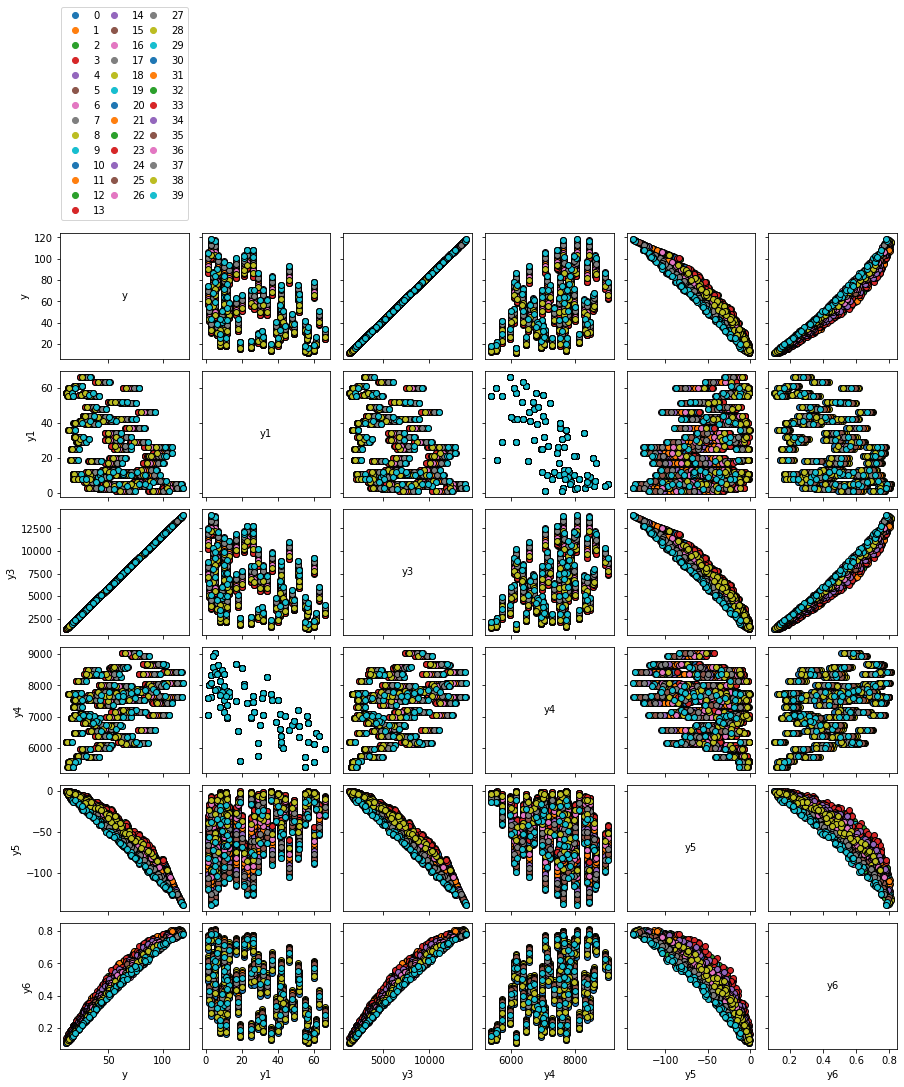

In [3]:
from ema_workbench.analysis import pairs_plotting
fig, axes = pairs_plotting.pairs_scatter(experiments, outcomes, group_by='policy',
                                         legend=True)
fig.set_size_inches(15, 15)
fig.savefig(r'C:\Saeid\Prj100\SA_2\snowModelUZH\case3_hoch-ybrig_v3_2\CHrandomness_3\SA_All.svg', format='svg', dpi=1200)
plt.show()

### Address of outputs

In [5]:
rootVisualization = r'C:\Saeid\Prj100\SA_2\snowModelUZH\case3_hoch-ybrig_v3_2\CHrandomness_3'


# We have five types of outputs
outDaily = os.path.join(rootVisualization, 'Outputs_py')
outSeasonTippingPoint = os.path.join(rootVisualization, 'outSeason')
outSeason_Likelihood_survival = os.path.join(rootVisualization, 'outSeason_Likelihood_survival')
outSeasonArtificialSnowPossibility = os.path.join(rootVisualization, 'outSeasonArt')
outSeasonFinancial = os.path.join(rootVisualization, 'outSeasonFinancial')
out_ema = os.path.join(rootVisualization, '3200_runs')

In [6]:
df4_ema_experiment = pd.read_csv(os.path.join(out_ema, 'experiments.csv'))
df4_ema_y = pd.read_csv(os.path.join(out_ema, 'y.csv'))
df4_ema_y1 = pd.read_csv(os.path.join(out_ema, 'y1.csv'))
df4_ema_y3 = pd.read_csv(os.path.join(out_ema, 'y3.csv'))
df4_ema_y4 = pd.read_csv(os.path.join(out_ema, 'y4.csv'))
df4_ema_y5 = pd.read_csv(os.path.join(out_ema, 'y5.csv'))
df4_ema_y6 = pd.read_csv(os.path.join(out_ema, 'y6.csv'))

In [7]:
#df4_ema_y

In [8]:
#df4_ema_experiment

In [9]:
df_final_ema = pd.concat((df4_ema_experiment, df4_ema_y, df4_ema_y1, df4_ema_y3, df4_ema_y4, df4_ema_y5, df4_ema_y6 ), axis = 1)

In [10]:
df_final_ema

,X2fM,X3iPot,X5temp,X6tempArt,xClimateModel,xRCP,x1SnowThershold,xGoodDays,scenario,policy,model,Yout,Yout1,Yout3,Yout4,Yout5,Yout6
0,1.487247,990.403481,2.196029,-1.120409,0.839359,1.481202,286.257147,83.452076,0,0,UZHModel,30.685934,9,3620.940237,8486.84,-10.85,0.292404
1,1.013916,1029.869638,0.456217,-1.591145,0.965364,0.815956,286.257147,83.452076,1,0,UZHModel,18.361110,11,2166.611002,7760.62,-2.01,0.186021
2,1.108168,1023.478011,2.642172,-1.974096,0.235788,1.692340,286.257147,83.452076,2,0,UZHModel,48.685035,17,5744.834123,7500.72,-24.36,0.458592
3,1.564384,928.519458,0.244029,-1.540433,0.691512,3.213343,286.257147,83.452076,3,0,UZHModel,11.859946,57,1399.473597,6173.69,-1.27,0.120438
4,1.567263,996.749460,3.643228,-1.515447,0.614939,2.859627,286.257147,83.452076,4,0,UZHModel,32.101137,55,3787.934193,5720.03,-15.87,0.306673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3195,1.208643,1035.473138,3.427015,-1.877669,0.513155,3.164742,203.604134,98.837293,75,39,UZHModel,67.237286,52,7933.999750,6344.44,-70.49,0.504966
3196,1.166664,1044.968569,0.870009,-1.749155,0.856158,2.221623,203.604134,98.837293,76,39,UZHModel,26.947954,32,3179.858519,7034.96,-23.21,0.227655
3197,1.465238,978.983596,4.078082,-1.430130,0.746953,2.046015,203.604134,98.837293,77,39,UZHModel,61.084745,30,7207.999967,6718.99,-63.81,0.474130
3198,1.522537,964.140427,1.361577,-1.068783,0.120867,3.034475,203.604134,98.837293,78,39,UZHModel,26.043754,40,3073.162990,7528.63,-18.39,0.219514


In [55]:
# Taking the values
x2 = df_final_ema['X2fM'].values
x3 = df_final_ema['X3iPot'].values
x5 = df_final_ema['X5temp'].values
x6 = df_final_ema['X6tempArt'].values
xRCP = df_final_ema['xRCP'].values
xClimateModel = df_final_ema['xClimateModel'].values
x1SnowThershold = df_final_ema['x1SnowThershold'].values
xGoodDays = df_final_ema['xGoodDays'].values
YY = df_final_ema['Yout'].values
y1 = df_final_ema['Yout1'].values
y3 = df_final_ema['Yout3'].values
y4 = df_final_ema['Yout4'].values
y5 = df_final_ema['Yout5'].values
y6 = df_final_ema['Yout6'].values

In [11]:
#outFolder = r'C:\Saeid\Prj100\SA_2\snowModelUZH\case3_hoch-ybrig_v3_2\CHrandomness_3'
outFolder = rootVisualization

In [12]:
outSeasonFolder = os.path.join(outFolder, 'outSeason')

In [13]:
#### 2020/07/22 ####
all_Files = []
for filename in os.walk(outSeasonFolder):
    all_Files = filename[2]
    
totalFiles_loc = []
for i in range(len(all_Files)):
    totalFiles_loc.append(os.path.join(outSeasonFolder, all_Files[i]))

### Total number of outputs

In [14]:
len(totalFiles_loc)

3200

In [15]:
emptyMatrixGoodDays = [np.empty([119, 69]) for _ in range(len(totalFiles_loc))]
    
for i in range(0, len(totalFiles_loc), 1):
    b = []
    with open(totalFiles_loc[i], 'r') as file:
        outputReaderlines = file.readlines()
        for j in range (len(outputReaderlines)):
            b.append(outputReaderlines[j].replace('\n','').split(','))
    
    emptyMatrixGoodDays[i] = np.array(b)

In [16]:
#matrix_GoodDays = np.stack((emptyMatrixGoodDays[i] for i in range (0,len(totalFiles_loc),1)), axis=2)
matrix_GoodDays = np.stack((emptyMatrixGoodDays[i] for i in range (0,len(totalFiles_loc),1)), axis=0)

c:\users\saeed\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3337: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if (await self.run_code(code, result,  async_=asy)):


In [17]:
matrix_GoodDays.shape

(3200, 119, 2)

In [18]:
print(type(matrix_GoodDays))
print(matrix_GoodDays.ndim)
print(len(matrix_GoodDays))
print(matrix_GoodDays.size)
print(matrix_GoodDays.dtype)
print(matrix_GoodDays.dtype.name)

<class 'numpy.ndarray'>
3
3200
761600
<U47
str1504


### Calculate the quantiles for each year of simulation (1981-2100)

In [19]:
matrix_GoodDays[2, 1:, 1:2].shape

(118, 1)

In [20]:
q10_years = np.quantile(matrix_GoodDays[:, 1:, 1:2].astype(float), 0.1, axis=0)
q25_years = np.quantile(matrix_GoodDays[:, 1:, 1:2].astype(float), 0.25, axis=0)
q50_years = np.quantile(matrix_GoodDays[:, 1:, 1:2].astype(float), 0.5, axis=0)
q75_years = np.quantile(matrix_GoodDays[:, 1:, 1:2].astype(float), 0.75, axis=0)
q90_years = np.quantile(matrix_GoodDays[:, 1:, 1:2].astype(float), 0.9, axis=0)

In [21]:
print(q10_years[0])
print(q25_years[0])
print(q50_years[0])
print(q75_years[0])
print(q90_years[0])
print(q50_years.shape)

[8.96615229]
[19.65347562]
[44.62857042]
[70.41012091]
[89.61144487]
(118, 1)


In [22]:
a22 =  matrix_GoodDays[3100, 1:, 1:2].astype(float)

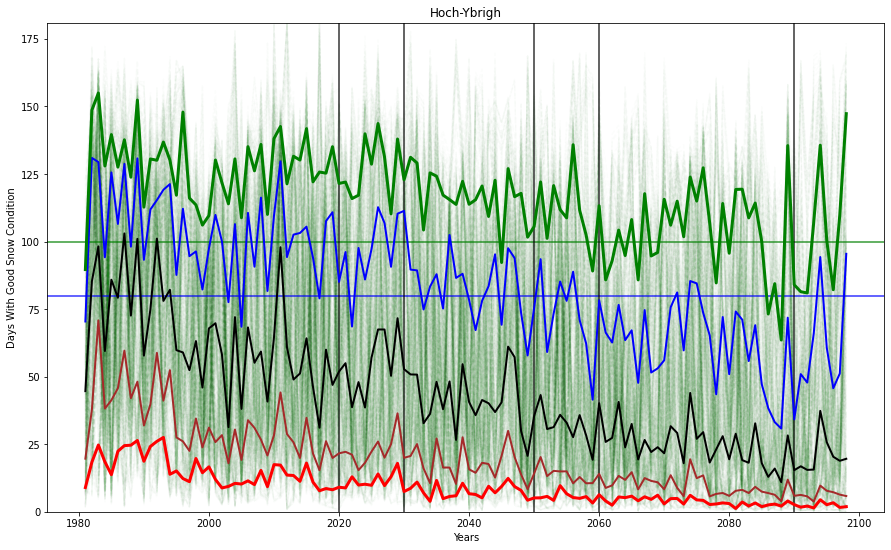

In [23]:
fig, axs = plt.subplots(figsize=(15,9))
x_axis = np.arange(1981, 2099, step=1)


for i in range(0, 3200, 5):
    a = matrix_GoodDays[i, 1:, 1:2].astype(float)
    plt.plot(x_axis, a[:,0], color='green', linestyle = '--', alpha=0.01)


axs.axhline(y=100, color='green', alpha=0.8)
axs.axhline(y=80, color='blue', alpha=0.8)

axs.axvline(x=2020, color='black', alpha=0.8)
axs.axvline(x=2030, color='black', alpha=0.8)
axs.axvline(x=2050, color='black', alpha=0.8)
axs.axvline(x=2060, color='black', alpha=0.8)
axs.axvline(x=2090, color='black', alpha=0.8)

plt.plot(x_axis, q10_years, color='red', linewidth = 3, alpha=1)
plt.plot(x_axis, q25_years, color='brown',linewidth = 2, alpha=1)
plt.plot(x_axis, q50_years, color='black', linewidth = 2, alpha=1)
plt.plot(x_axis, q75_years, color='blue', linewidth = 2, alpha=1)
plt.plot(x_axis, q90_years, color='green', linewidth = 3, alpha=1)


axs.set_ylim(bottom=0, top =181)
axs.set_title('Hoch-Ybrigh')
axs.set_xlabel('Years')
axs.set_ylabel('Days With Good Snow Condition')

fig.savefig(r'C:\Saeid\Prj100\SA_2\snowModelUZH\case3_hoch-ybrig_v3_2\CHrandomness_3\RCP_All.svg', format='svg', dpi=1200)

plt.show()

In [24]:
experiments, outcomes = load_results(fh)
print(experiments.shape)
print(list(outcomes.keys()))

[MainProcess/INFO] results loaded succesfully from C:\Saeid\Prj100\SA_2\snowModelUZH\case3_hoch-ybrig_v3_2\CHrandomness_3\3200_runs.tar.gz


(3200, 11)
['y', 'y1', 'y3', 'y4', 'y5', 'y6']


### Visualization with ema-workbench - part2 

In [25]:
from ema_workbench.analysis import prim

x = experiments
y = outcomes['y'] < 50
prim_alg = prim.Prim(x, y, threshold=0.8)
box1 = prim_alg.find_box()

[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] 3200 points remaining, containing 1506 cases of interest
[MainProcess/DEBUG] peeling completed
[MainProcess/DEBUG] pasting X3iPot
[MainProcess/DEBUG] pasting X5temp
[MainProcess/DEBUG] pasting X6tempArt
[MainProcess/DEBUG] pasting x1SnowThershold
[MainProcess/DEBUG] pasting policy
[MainProcess/DEBUG] pasting X5temp
[MainProcess/DEBUG] pasting X6tempArt
[MainProcess/DEBUG] pasting x1SnowThershold
[MainProcess/DEBUG] pasting policy
[MainProcess/DEBUG] pasting completed
[MainProcess/INFO] mean: 0.8947368421052632, mass: 0.11875, coverage: 0.22576361221779548, density: 0.8947368421052632 restricted_dimensions: 4


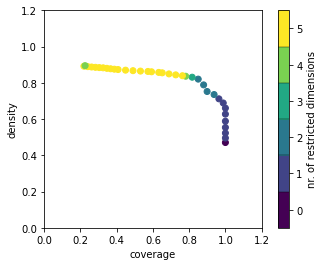

In [37]:
box1.show_tradeoff()

plt.show()

coverage    0.780876
density     0.836415
id                14
mass        0.439375
mean        0.836415
res_dim            4
Name: 14, dtype: object

                     box 14                                             
                        min          max                       qp values
X5temp             0.063092     3.055589  [-1.0, 1.808671660399288e-161]
X6tempArt         -1.953520    -1.004209      [0.1577539331777514, -1.0]
x1SnowThershold  204.727630   298.121199      [0.3112526738382119, -1.0]
X3iPot           908.567530  1098.570947      [0.6857739631750741, -1.0]



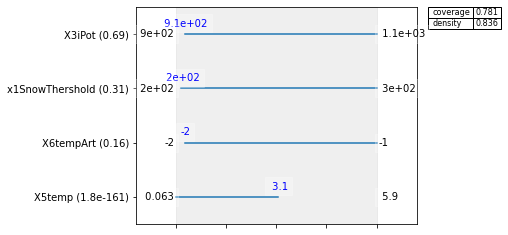

In [28]:
box1.inspect(14)
box1.inspect(14, style='graph')
plt.show()

policy [0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 2]


c:\users\saeed\appdata\local\programs\python\python37\lib\site-packages\ema_workbench\analysis\scenario_discovery_util.py:404: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels)


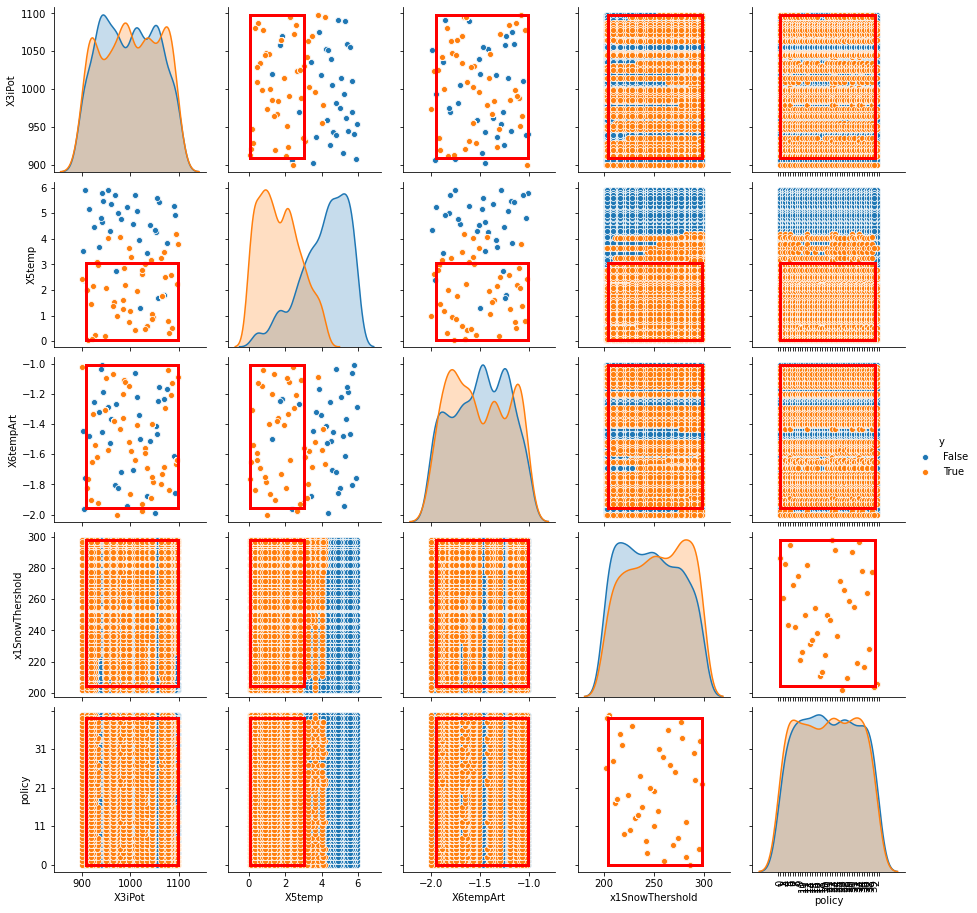

In [41]:
#fig, axs = plt.subplots()
axs = box1.show_pairs_scatter(15)
plt.show()

### Visualization with ema-workbench - part3

[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
c:\users\saeed\appdata\local\programs\python\python37\lib\site-packages\ema_workbench\analysis\feature_scoring.py:307: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  extra_trees.fit(x, y)
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category


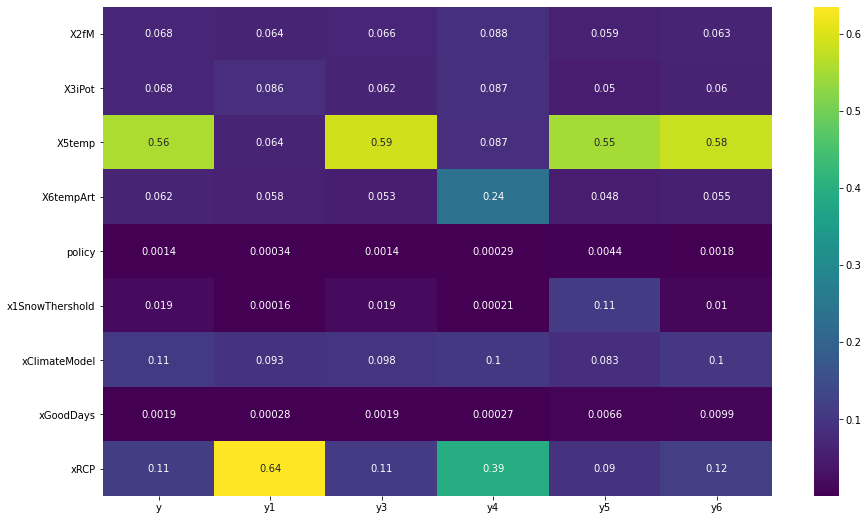

In [45]:
from ema_workbench.analysis import feature_scoring

fig, ax = plt.subplots(figsize=(15,9))

x = experiments
Y = outcomes

fs = feature_scoring.get_feature_scores_all(x, Y)
ax = sns.heatmap(fs, cmap='viridis', annot=True)
plt.show()

In [46]:
x = experiments
Y = outcomes['y'] <30
#fs, alg = feature_scoring.get_ex_feature_scores(x, y, mode=feature_scoring.CLASSIFICATION)
fs, alg = feature_scoring.get_ex_feature_scores(x, Y)

fs.sort_values(ascending=False, by=1)

[MainProcess/INFO] model dropped from analysis because only a single category


,1
0,
X5temp,0.423724
xClimateModel,0.135001
xRCP,0.121859
X2fM,0.116682
X3iPot,0.071990
X6tempArt,0.071461
x1SnowThershold,0.045650
policy,0.006945
xGoodDays,0.006688


[MainProcess/INFO] model dropped from analysis because only a single category


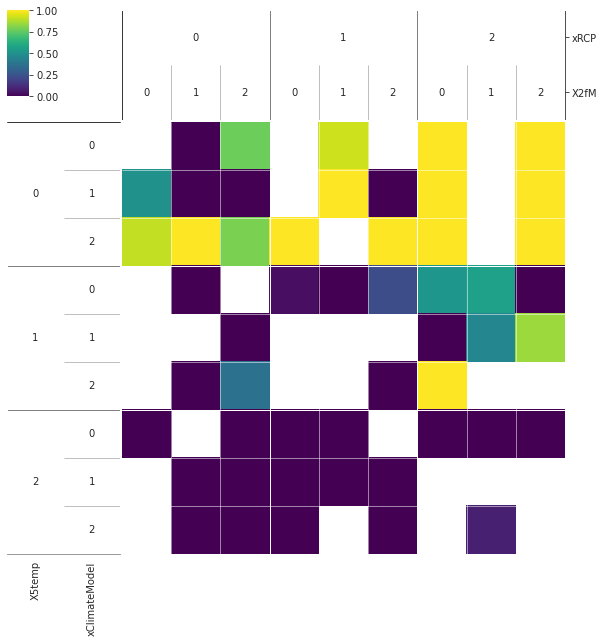

In [47]:
from ema_workbench.analysis import dimensional_stacking

x = experiments
y = outcomes['y'] <40
dimensional_stacking.create_pivot_plot(x,y, 2, nbins=3)
plt.show()

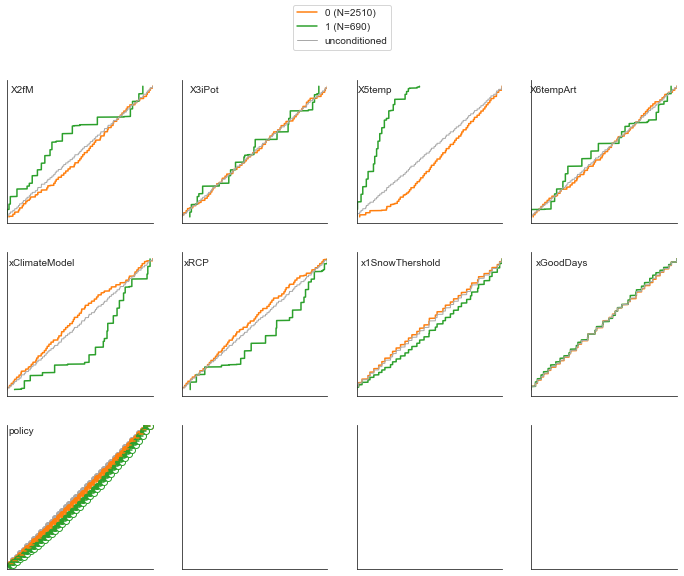

In [48]:
from ema_workbench.analysis import regional_sa
from numpy.lib import recfunctions as rf

sns.set_style('white')

# model is the same across experiments
x = experiments.copy()
x = x.drop('model', axis=1)
y = outcomes['y'] < 30
fig = regional_sa.plot_cdfs(x,y)
sns.despine()
plt.show()

In [49]:
#quantilesRuns = df_final_ema.Yout.quantile([0.05, 0.1, .25, 0.5, .75, 0.9, 0.95], interpolation='lower').to_list()

In [50]:
#quantilesRuns

In [51]:
#df_final_ema.index.values

In [52]:
#indexQuantiles = []
#for i , j in enumerate(quantilesRuns):
 #   filtQ = (df_final_ema['Yout'] == quantilesRuns[i])
 #   indexQuantiles.append(df_final_ema[filtQ].index.values)

In [53]:
#indexQuantiles

### Scatter Plots (Inputs vs Outputs)

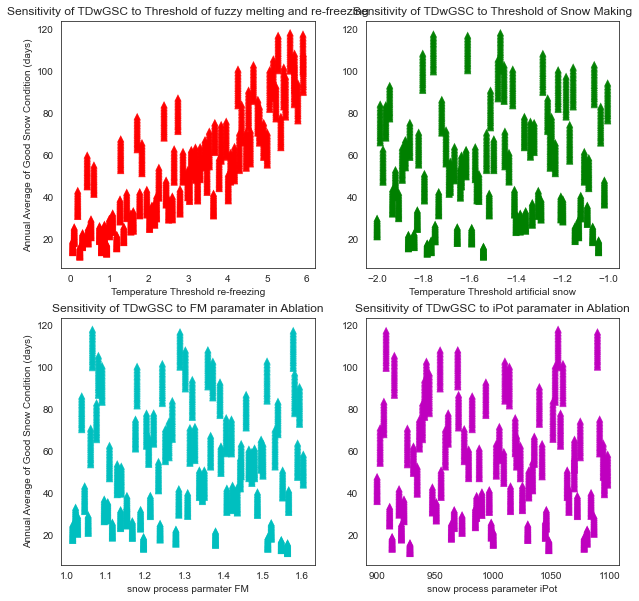

In [56]:
#fig, (ax1, ax2) = plt.subplots(1,2)
fig, axs = plt.subplots(2, 2, figsize=(10,10))
#axs[0,0].scatter(xGoodDays, y, s = 200, c='b' , marker='o', alpha=0.7, cmap='viridis', 
 #          edgecolors='none', label='Good Days Condition')

#axs[0,1].scatter(x1SnowThershold, y, s = 200, c='orange' , marker='o', alpha=0.7, cmap='viridis', 
 #          edgecolors='none', label='Snow Threshold Condition')

axs[0,0].scatter(x5, YY, s = 50, c='r' , marker='^', alpha=0.7, cmap='viridis', 
           edgecolors='none', label='Temperature melt')

axs[0,1].scatter(x6, YY, s = 50, c='g' , marker='^', alpha=0.7, cmap='viridis', 
           edgecolors='none', label='Temperature artificial snow')

axs[1,0].scatter(x2, YY, s = 50, c='c' , marker='^', alpha=0.7, cmap='viridis', 
           edgecolors='none', label='Temperature melt')

axs[1,1].scatter(x3, YY, s = 50, c='m' , marker='^', alpha=0.7, cmap='viridis', 
           edgecolors='none', label='Temperature artificial snow')


# produce a legend with the unique colors from the scatter
#axs[0,0].set_xlabel("Good Days Condition")
#axs[0,1].set_xlabel("Snow Threshold Condition")
axs[0,0].set_xlabel("Temperature Threshold re-freezing")
axs[0,1].set_xlabel("Temperature Threshold artificial snow")
axs[1,0].set_xlabel("snow process parmater FM")
axs[1,1].set_xlabel("snow process parameter iPot")


axs[0,0].set_ylabel("Annual Average of Good Snow Condition (days)")
#axs[0,1].set_ylabel("Frequency of Tipping points")
axs[1,0].set_ylabel("Annual Average of Good Snow Condition (days)")
#axs[1,1].set_ylabel("Frequency of Tipping points")
#axs[2,0].set_ylabel("Annual Average of Good Snow Condition (days)")
#axs[2,1].set_ylabel("Frequency of Tipping points")

#axs[0,0].set_title('Sensitivity of TDwGSC to Policy-1 (less that 100 days)')
#axs[0,1].set_title('Sensitivity of TDwGSC to Policy-2 (300 mm)')
axs[0,0].set_title('Sensitivity of TDwGSC to Threshold of fuzzy melting and re-freezing')
axs[0,1].set_title('Sensitivity of TDwGSC to Threshold of Snow Making')
axs[1,0].set_title('Sensitivity of TDwGSC to FM paramater in Ablation')
axs[1,1].set_title('Sensitivity of TDwGSC to iPot paramater in Ablation')


#axs[0,0].text(0, 130, r'A', fontsize=15)
#axs[0,1].text(-1.9, 130, r'B', fontsize=15)
#axs[1,0].text(1.04, 130, r'C', fontsize=15)
#axs[1,1].text(920, 130, r'D', fontsize=15)


fig.savefig(r'C:\Saeid\Prj100\SA_2\snowModelUZH\case3_hoch-ybrig_v3_2\CHrandomness_3\SA_All.svg', format='svg', dpi=300)
plt.show()


## 3D Scatter Plot

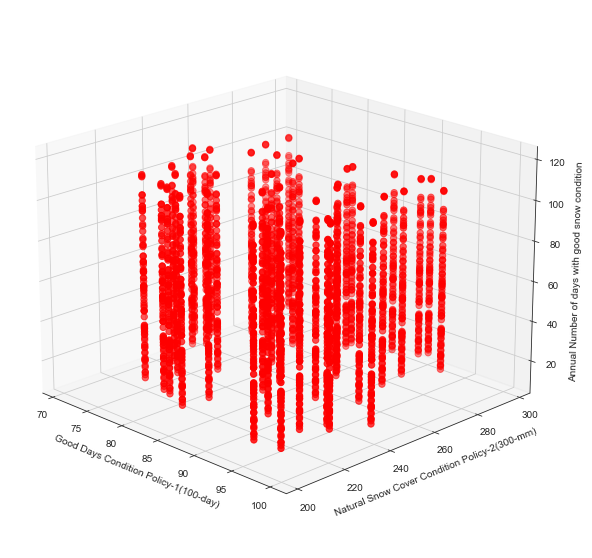

In [57]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xGoodDays, x1SnowThershold, YY, s = 40, c='r', marker='o')

ax.set_xlabel('Good Days Condition Policy-1(100-day)')
ax.set_ylabel('Natural Snow Cover Condition Policy-2(300-mm)')
ax.set_zlabel('Annual Number of days with good snow condition')


#ax.scatter(100, 300, 40, color='green')


#x = np.linspace(75,100,5)
#y = np.linspace(220,300,16)
#X,Y = np.meshgrid(x,y)
#Z= X + Y -X - Y + 40 
#surf = ax.plot_surface(X, Y, Z, alpha = 0.2)
ax.view_init(20, -45)


fig.savefig(r'C:\Saeid\Prj100\SA_2\snowModelUZH\case3_hoch-ybrig_v3_2\CHrandomness_3\SA_Policy_All.svg', format='svg', dpi=1200)
plt.show()

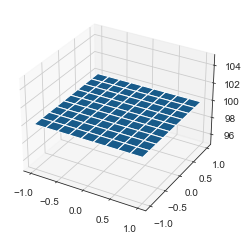

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x = np.linspace(-1,1,10)
y = np.linspace(-1,1,10)

X,Y = np.meshgrid(x,y)
Z= X + Y -X - Y + 100 

fig = plt.figure()
ax = fig.gca(projection='3d')


surf = ax.plot_surface(X, Y, Z)

### Defining the Q0.9 and Q0.1 databases

In [59]:
print(q10_years[0])
print(q25_years[0])
print(q50_years[0])
print(q75_years[0])
print(q90_years[0])
print(q50_years.shape)

[8.96615229]
[19.65347562]
[44.62857042]
[70.41012091]
[89.61144487]
(118, 1)


In [60]:
matrix_GoodDays[:, :, 1:2].shape

(3200, 119, 1)

## Analysis for different RCP2.6, RCP4.5, and RCP8.5

In [89]:
ABC = pd.DataFrame(matrix_GoodDays[0])
ABC1 = pd.DataFrame(matrix_GoodDays[1])

In [ ]:
matrix_GoodDays26 =
matrix_GoodDays45 =
matrix_GoodDays85 =

for i in range(3200):
    if matrix_GoodDays[1, i, 1:2].str.contain.('26'):
        matrix_GoodDays26 = np.stack((matrix_GoodDays26, matrix_GoodDays[i], axis=0))
    elif matrix_GoodDays[1, i, 1:2].str.contain.('45'):
        matrix_GoodDays45 = np.stack((matrix_GoodDays45, matrix_GoodDays[i], axis=0))
    else:
        matrix_GoodDays85 = np.stack((matrix_GoodDays85, matrix_GoodDays[i], axis=0))


array(['isOverSnow_SMHI-RCA-NORESM-EUR44-RCP26-pcp'], dtype='<U47')

In [ ]:
####
df1_s_tipping_min = pd.read_csv(os.path.join(outSeasonTippingPoint, 'season_Total_daily_47-0000000_8-7708333_5.csv'))
df1_s_tipping_max = pd.read_csv(os.path.join(outSeasonTippingPoint, 'season_Total_daily_47-0000000_8-7708333_1.csv'))
df1_s_tipping_med = pd.read_csv(os.path.join(outSeasonTippingPoint, 'season_Total_daily_47-0000000_8-7708333_3.csv'))
####
df2_s_Art_min = pd.read_csv(os.path.join(outSeasonArtificialSnowPossibility, 'season_Art_Total_Moneydaily_47-0000000_8-7708333_5.csv'))
df2_s_Art_max = pd.read_csv(os.path.join(outSeasonArtificialSnowPossibility, 'season_Art_Total_Moneydaily_47-0000000_8-7708333_1.csv'))
df2_s_Art_med = pd.read_csv(os.path.join(outSeasonArtificialSnowPossibility, 'season_Art_Total_Moneydaily_47-0000000_8-7708333_3.csv'))

####
df3_s_Financial_min = pd.read_csv(os.path.join(outSeasonFinancial, 'season_Financial_Total_Moneydaily_47-0000000_8-7708333_1.csv'))
df3_s_Financial_max = pd.read_csv(os.path.join(outSeasonFinancial, 'season_Financial_Total_Moneydaily_47-0000000_8-7708333_5.csv'))
#df3_s_Financial_med = pd.read_csv(os.path.join(outSeasonFinancial, 'season_Financial_Total_Moneydaily_47-0000000_8-7708333.csv'))
df3_s_Financial_med = pd.read_csv(os.path.join(outSeasonFinancial, '0_5_season.csv'))

In [ ]:
#df3_s_Financial_min

In [ ]:
#df3_s_Financial_max

In [ ]:
#df3_s_Financial_med

In [ ]:
####
df1_s_tipping_minColumns= df1_s_tipping_min.columns
df1_s_tipping_maxColumns= df1_s_tipping_max.columns
df1_s_tipping_medColumns= df1_s_tipping_med.columns

####
df2_s_Art_minColumns = df2_s_Art_min.columns
df2_s_Art_maxColumns = df2_s_Art_max.columns
df2_s_Art_medColumns = df2_s_Art_med.columns

####
df3_s_Financial_minColumns = df3_s_Financial_min.columns
df3_s_Financial_maxColumns = df3_s_Financial_max.columns
df3_s_Financial_medColumns = df3_s_Financial_med.columns


In [ ]:
####
filt1 = df1_s_tipping_min.columns.str.contains('26')
filt2 = df1_s_tipping_min.columns.str.contains('45')
filt3 = df1_s_tipping_min.columns.str.contains('85')

filt4 = df1_s_tipping_max.columns.str.contains('26')
filt5 = df1_s_tipping_max.columns.str.contains('45')
filt6 = df1_s_tipping_max.columns.str.contains('85')

filt19 = df1_s_tipping_med.columns.str.contains('26')
filt20 = df1_s_tipping_med.columns.str.contains('45')
filt21 = df1_s_tipping_med.columns.str.contains('85')

####
filt7 = df2_s_Art_min.columns.str.contains('26')
filt8 = df2_s_Art_min.columns.str.contains('45')
filt9 = df2_s_Art_min.columns.str.contains('85')

filt10 = df2_s_Art_max.columns.str.contains('26')
filt11 = df2_s_Art_max.columns.str.contains('45')
filt12 = df2_s_Art_max.columns.str.contains('85')

filt22 = df2_s_Art_med.columns.str.contains('26')
filt23 = df2_s_Art_med.columns.str.contains('45')
filt24 = df2_s_Art_med.columns.str.contains('85')


#### 
filt13 = df3_s_Financial_min.columns.str.contains('26')
filt14 = df3_s_Financial_min.columns.str.contains('45')
filt15 = df3_s_Financial_min.columns.str.contains('85')

filt16 = df3_s_Financial_max.columns.str.contains('26')
filt17 = df3_s_Financial_max.columns.str.contains('45')
filt18 = df3_s_Financial_max.columns.str.contains('85')

filt25 = df3_s_Financial_max.columns.str.contains('26')
filt26 = df3_s_Financial_max.columns.str.contains('45')
filt27 = df3_s_Financial_max.columns.str.contains('85')

In [ ]:
####
df1_s_tipping_minRCP26 = df1_s_tipping_min.loc[:, filt1]
df1_s_tipping_minRCP45 = df1_s_tipping_min.loc[:, filt2]
df1_s_tipping_minRCP85 = df1_s_tipping_min.loc[:, filt3]

df1_s_tipping_maxRCP26 = df1_s_tipping_max.loc[:, filt4]
df1_s_tipping_maxRCP45 = df1_s_tipping_max.loc[:, filt5]
df1_s_tipping_maxRCP85 = df1_s_tipping_max.loc[:, filt6]

df1_s_tipping_medRCP26 = df1_s_tipping_med.loc[:, filt19]
df1_s_tipping_medRCP45 = df1_s_tipping_med.loc[:, filt20]
df1_s_tipping_medRCP85 = df1_s_tipping_med.loc[:, filt21]

####
df2_s_Art_minRCP26 = df2_s_Art_min.loc[:, filt7]
df2_s_Art_minRCP45 = df2_s_Art_min.loc[:, filt8]
df2_s_Art_minRCP85 = df2_s_Art_min.loc[:, filt9]

df2_s_Art_maxRCP26 = df2_s_Art_max.loc[:, filt10]
df2_s_Art_maxRCP45 = df2_s_Art_max.loc[:, filt11]
df2_s_Art_maxRCP85 = df2_s_Art_max.loc[:, filt12]

df2_s_Art_medRCP26 = df2_s_Art_med.loc[:, filt22]
df2_s_Art_medRCP45 = df2_s_Art_med.loc[:, filt23]
df2_s_Art_medRCP85 = df2_s_Art_med.loc[:, filt24]

####
df3_s_Financial_minRCP26 = df3_s_Financial_min.loc[:, filt13]
df3_s_Financial_minRCP45 = df3_s_Financial_min.loc[:, filt14]
df3_s_Financial_minRCP85 = df3_s_Financial_min.loc[:, filt15]

df3_s_Financial_maxRCP26 = df3_s_Financial_max.loc[:, filt16]
df3_s_Financial_maxRCP45 = df3_s_Financial_max.loc[:, filt17]
df3_s_Financial_maxRCP85 = df3_s_Financial_max.loc[:, filt18]

df3_s_Financial_medRCP26 = df3_s_Financial_med.loc[:, filt25]
df3_s_Financial_medRCP45 = df3_s_Financial_med.loc[:, filt26]
df3_s_Financial_medRCP85 = df3_s_Financial_med.loc[:, filt27]

In [ ]:
####
df1_s_tipping_minRCP26Columns= df1_s_tipping_minRCP26.columns
df1_s_tipping_maxRCP26Columns= df1_s_tipping_maxRCP26.columns
df1_s_tipping_medRCP26Columns= df1_s_tipping_medRCP26.columns

df1_s_tipping_minRCP45Columns= df1_s_tipping_minRCP45.columns
df1_s_tipping_maxRCP45Columns= df1_s_tipping_maxRCP45.columns
df1_s_tipping_medRCP45Columns= df1_s_tipping_medRCP45.columns

df1_s_tipping_minRCP85Columns= df1_s_tipping_minRCP85.columns
df1_s_tipping_maxRCP85Columns= df1_s_tipping_maxRCP85.columns
df1_s_tipping_medRCP85Columns= df1_s_tipping_medRCP85.columns

####
df2_s_Art_minRCP26Columns = df2_s_Art_minRCP26.columns
df2_s_Art_maxRCP26Columns = df2_s_Art_maxRCP26.columns
df2_s_Art_medRCP26Columns = df2_s_Art_medRCP26.columns

df2_s_Art_minRCP45Columns = df2_s_Art_minRCP45.columns
df2_s_Art_maxRCP45Columns = df2_s_Art_maxRCP45.columns
df2_s_Art_medRCP45Columns = df2_s_Art_medRCP45.columns

df2_s_Art_minRCP85Columns = df2_s_Art_minRCP85.columns
df2_s_Art_maxRCP85Columns = df2_s_Art_maxRCP85.columns
df2_s_Art_medRCP85Columns = df2_s_Art_medRCP85.columns

####
df3_s_Financial_minRCP26Columns = df3_s_Financial_minRCP26.columns
df3_s_Financial_maxRCP26Columns = df3_s_Financial_maxRCP26.columns
df3_s_Financial_medRCP26Columns = df3_s_Financial_medRCP26.columns

df3_s_Financial_minRCP45Columns = df3_s_Financial_minRCP45.columns
df3_s_Financial_maxRCP45Columns = df3_s_Financial_maxRCP45.columns
df3_s_Financial_medRCP45Columns = df3_s_Financial_medRCP45.columns

df3_s_Financial_minRCP85Columns = df3_s_Financial_minRCP85.columns
df3_s_Financial_maxRCP85Columns = df3_s_Financial_maxRCP85.columns
df3_s_Financial_medRCP85Columns = df3_s_Financial_medRCP85.columns

In [ ]:
df1_s_tipping_medRCP85.shape

In [ ]:
dfsColumns = [df1_s_tipping_minColumns, df1_s_tipping_maxColumns, df1_s_tipping_medColumns, df2_s_Art_minColumns, df2_s_Art_maxColumns, df2_s_Art_medColumns, df3_s_Financial_minColumns, df3_s_Financial_maxColumns, df3_s_Financial_medColumns]
dfs = [df1_s_tipping_min, df1_s_tipping_max,  df1_s_tipping_med, df2_s_Art_min, df2_s_Art_max, df2_s_Art_med, df3_s_Financial_min, df3_s_Financial_max, df3_s_Financial_med]

In [ ]:
df1_s_tipping_min.shape

In [ ]:
def generate_plot_all(df, dfColumns, m, n, colorLines):
    for i in range (1 , len(dfColumns), 1):
        #res1_sc1 = df[dfColumns[i]]
        axs[m,n].plot(x_axis, df[dfColumns[i]], color=colorLines, linestyle = '--', alpha=0.02)
        return
        
def generate_plot_max_min(df, m, n, BotYaxis, TopYaxis,fig_Title, fig_X_Lable, fig_Y_Lable, Y, figLabel, figLabelYPos):
    
    axs[m,n].axhline(y=Y, color='green')
    axs[m,n].set_ylim(bottom=BotYaxis, top =TopYaxis)
    axs[m,n].set_title(fig_Title)
    axs[m,n].set_xlabel(fig_X_Lable)
    axs[m,n].set_ylabel(fig_Y_Lable)
    
        
    axs[m,n].plot(x_axis, df.max(axis=1), color='blue', linestyle = '--', alpha=0.8)
    axs[m,n].plot(x_axis, df.min(axis=1), color='red', linestyle = '--', alpha=0.8)
    axs[m,n].fill_between(x_axis[0:118], df.max(axis=1), df.min(axis=1), alpha=0.15, color='C1')
    axs[m,n].text(1980, figLabelYPos, figLabel, fontsize=15)

        #plt.xticks(np.arange(1981, 2099, step=20))
         #Possible Colors: color='#DBFF33',
    return

### RCP All, Tipping Points, Good days for Snow Making, Profit

In [ ]:
m = 3
n = 3
fig, axs = plt.subplots(m, n, figsize=(15,15))

lengthSim = 118
#x_axis = np.arange(y)
x_axis = np.arange(1981, 2099, step=1)
#plt.style.use('seaborn')

RCP = "All RCPs"
generate_plot_max_min(df1_s_tipping_min, 0,0,0,225, 'Resort3_Hoch-brig Q10 Case {}'.format(RCP),"","Days with good snow condition for Ski", 100, 'A', 200)
generate_plot_max_min(df1_s_tipping_med, 0,1,0,225, 'Resort3_Hoch-brig Q50 Case {}'.format(RCP),"","", 100, 'B', 200)
generate_plot_max_min(df1_s_tipping_max, 0,2,0,225, 'Resort3_Hoch-brig Q90 Case {}'.format(RCP),"","", 100, 'C', 200)
generate_plot_max_min(df2_s_Art_min, 1,0,0,225, 'Resort3_Hoch-brig Q10 Case {}'.format(RCP),"","Days with good condition for Artificial Snow", 50, 'D', 200)
generate_plot_max_min(df2_s_Art_med, 1,1,0,225, 'Resort3_Hoch-brig Q50 Case {}'.format(RCP),"","", 50, 'E', 200)
generate_plot_max_min(df2_s_Art_max, 1,2,0,225, 'Resort3_Hoch-brig Q90 Case {}'.format(RCP),"","", 50, 'F', 200)
generate_plot_max_min(df3_s_Financial_min, 2,0,-2,2, 'Resort3_Hoch-brig Q10 Case {}'.format(RCP),"Time starting from 1981 (years)","Profit (M CHF)", 0, 'G', 1.65)
generate_plot_max_min(df3_s_Financial_med, 2,1,-2,2, 'Resort3_Hoch-brig Q50 Case {}'.format(RCP),"Time starting from 1981 (years)","", 0, 'H', 1.65)
generate_plot_max_min(df3_s_Financial_max, 2,2,-2,2, 'Resort3_Hoch-brig Q90 Case {}'.format(RCP),"Time starting from 1981 (years)","", 0, 'I', 1.65)




fig.savefig(r'C:\Saeid\Prj100\SA_2\snowModelUZH\case3_hoch-ybrig_v3_2\CHrandomness_3\RCP_All.svg', format='svg', dpi=1200)
plt.show()

In [ ]:
#fig, (ax1 , ax2) = plt.subplots(1, 2)
%matplotlib inline
m = 3
n = 2
fig, axs = plt.subplots(m, n, figsize=(15,15))

lengthSim = 118
#x_axis = np.arange(y)
x_axis = np.arange(1981, 2099, step=1)
#plt.style.use('seaborn')

RCP = "All RCPs"
generate_plot_max_min(df1_s_tipping_min, 0,0,0,225, 'Resort3_Hoch-brig Worst Case {}'.format(RCP),"","Days with good snow condition for Ski", 100, 'A', 200)
generate_plot_max_min(df1_s_tipping_max, 0,1,0,225, 'Resort3_Hoch-brig Best Case {}'.format(RCP),"","", 100, 'B', 200)
generate_plot_max_min(df2_s_Art_min, 1,0,0,225, 'Resort3_Hoch-brig Worst Case {}'.format(RCP),"","Days with good condition for Artificial Snow", 50, 'C', 200)
generate_plot_max_min(df2_s_Art_max, 1,1,0,225, 'Resort3_Hoch-brig Best Case {}'.format(RCP),"","", 50, 'D', 200)
generate_plot_max_min(df3_s_Financial_min, 2,0,-2,2, 'Resort3_Hoch-brig Worst Case {}'.format(RCP),"Time starting from 1981 (years)","Profit (M CHF)", 0, 'E', 1.65)
generate_plot_max_min(df3_s_Financial_max, 2,1,-2,2, 'Resort3_Hoch-brig Best Case {}'.format(RCP),"Time starting from 1981 (years)","", 0, 'F', 1.65)

plt.show()

### RCP 2.6 , Tipping Points, Good days for Snow Making, Profit


In [ ]:
#fig, (ax1 , ax2) = plt.subplots(1, 2)
%matplotlib inline

m = 3
n = 2
fig, axs = plt.subplots(m, n, figsize=(15,15))
y = 118
#x_axis = np.arange(y)
x_axis = np.arange(1981, 2099, step=1)
#plt.style.use('seaborn')

RCP = "RCP2.6"

generate_plot_max_min(df1_s_tipping_minRCP26, 0,0,0,225, 'Resort3_Hoch-brig Worst Case {}'.format(RCP),"","Days with good snow condition for Ski", 100, 'A', 200)
generate_plot_max_min(df1_s_tipping_maxRCP26, 0,1,0,225, 'Resort3_Hoch-brig Best Case {}'.format(RCP),"","", 100, 'B', 200)
generate_plot_max_min(df2_s_Art_minRCP26, 1,0,0,225, 'Resort3_Hoch-brig Worst Case {}'.format(RCP),"","Days with good condition for Artificial Snow", 50, 'C', 200)
generate_plot_max_min(df2_s_Art_maxRCP26, 1,1,0,225, 'Resort3_Hoch-brig Best Case {}'.format(RCP),"","", 50, 'D', 200)
generate_plot_max_min(df3_s_Financial_minRCP26, 2,0,-2,2, 'Resort3_Hoch-brig Worst Case {}'.format(RCP),"Time starting from 1981 (years)","Profit (M CHF)", 0, 'E', 1.65)
generate_plot_max_min(df3_s_Financial_maxRCP26, 2,1,-2,2, 'Resort3_Hoch-brig Best Case {}'.format(RCP),"Time starting from 1981 (years)","", 0, 'F', 1.65)


plt.show()



In [ ]:

m = 3
n = 3
fig, axs = plt.subplots(m, n, figsize=(15,15))

lengthSim = 118
#x_axis = np.arange(y)
x_axis = np.arange(1981, 2099, step=1)
#plt.style.use('seaborn')

RCP = "RCPs2.6"

generate_plot_max_min(df1_s_tipping_minRCP26, 0,0,0,225, 'Resort3_Hoch-brig Q10 Case {}'.format(RCP),"","Days with good snow condition for Ski", 100, 'A', 200)
generate_plot_max_min(df1_s_tipping_medRCP26, 0,1,0,225, 'Resort3_Hoch-brig Q50 Case {}'.format(RCP),"","", 100, 'B', 200)
generate_plot_max_min(df1_s_tipping_maxRCP26, 0,2,0,225, 'Resort3_Hoch-brig Q90 Case {}'.format(RCP),"","", 100, 'C', 200)
generate_plot_max_min(df2_s_Art_minRCP26, 1,0,0,225, 'Resort3_Hoch-brig Q10 Case {}'.format(RCP),"","Days with good condition for Artificial Snow", 50, 'D', 200)
generate_plot_max_min(df2_s_Art_medRCP26, 1,1,0,225, 'Resort3_Hoch-brig Q50 Case {}'.format(RCP),"","", 50, 'E', 200)
generate_plot_max_min(df2_s_Art_maxRCP26, 1,2,0,225, 'Resort3_Hoch-brig Q90 Case {}'.format(RCP),"","", 50, 'F', 200)
generate_plot_max_min(df3_s_Financial_minRCP26, 2,0,-2,2, 'Resort3_Hoch-brig Q10 Case {}'.format(RCP),"Time starting from 1981 (years)","Profit (M CHF)", 0, 'G', 1.65)
generate_plot_max_min(df3_s_Financial_medRCP26, 2,1,-2,2, 'Resort3_Hoch-brig Q50 Case {}'.format(RCP),"Time starting from 1981 (years)","", 0, 'H', 1.65)
generate_plot_max_min(df3_s_Financial_maxRCP26, 2,2,-2,2, 'Resort3_Hoch-brig Q90 Case {}'.format(RCP),"Time starting from 1981 (years)","", 0, 'I', 1.65)



fig.savefig(r'C:\Saeid\Prj100\SA_2\snowModelUZH\case3_hoch-ybrig_v3_2\CHrandomness_3\RCP2.6_All.svg', format='svg', dpi=1200)
plt.show()

### RCP 4.5 , Tipping Points, Good days for Snow Making, Profit

In [ ]:
m = 3
n = 2
fig, axs = plt.subplots(m, n, figsize=(15,15))
y = 118
#x_axis = np.arange(y)
x_axis = np.arange(1981, 2099, step=1)
#plt.style.use('seaborn')

RCP = "RCP4.5"
generate_plot_max_min(df1_s_tipping_minRCP45, 0,0,0,225, 'Resort3_Hoch-brig Worst Case {}'.format(RCP),"","Days with good snow condition for Ski", 100, 'A', 200)
generate_plot_max_min(df1_s_tipping_maxRCP45, 0,1,0,225, 'Resort3_Hoch-brig Best Case {}'.format(RCP),"","", 100, 'B', 200)
generate_plot_max_min(df2_s_Art_minRCP45, 1,0,0,225, 'Resort3_Hoch-brig Worst Case {}'.format(RCP),"","Days with good condition for Artificial Snow", 50, 'C', 200)
generate_plot_max_min(df2_s_Art_maxRCP45, 1,1,0,225, 'Resort3_Hoch-brig Best Case {}'.format(RCP),"","", 50, 'D', 200)
generate_plot_max_min(df3_s_Financial_minRCP45, 2,0,-2,2, 'Resort3_Hoch-brig Worst Case {}'.format(RCP),"Time starting from 1981 (years)","Profit (M CHF)", 0, 'E', 1.65)
generate_plot_max_min(df3_s_Financial_maxRCP45, 2,1,-2,2, 'Resort3_Hoch-brig Best Case {}'.format(RCP),"Time starting from 1981 (years)","", 0, 'F', 1.65)

plt.show()

In [ ]:
m = 3
n = 3
fig, axs = plt.subplots(m, n, figsize=(15,15))

lengthSim = 118
#x_axis = np.arange(y)
x_axis = np.arange(1981, 2099, step=1)
#plt.style.use('seaborn')

RCP = "RCPs4.5"
generate_plot_max_min(df1_s_tipping_minRCP45, 0,0,0,225, 'Resort3_Hoch-brig Q10 Case {}'.format(RCP),"","Days with good snow condition for Ski", 100, 'A', 200)
generate_plot_max_min(df1_s_tipping_medRCP45, 0,1,0,225, 'Resort3_Hoch-brig Q50 Case {}'.format(RCP),"","", 100, 'B', 200)
generate_plot_max_min(df1_s_tipping_maxRCP45, 0,2,0,225, 'Resort3_Hoch-brig Q90 Case {}'.format(RCP),"","", 100, 'C', 200)
generate_plot_max_min(df2_s_Art_minRCP45, 1,0,0,225, 'Resort3_Hoch-brig Q10 Case {}'.format(RCP),"","Days with good condition for Artificial Snow", 50, 'D', 200)
generate_plot_max_min(df2_s_Art_medRCP45, 1,1,0,225, 'Resort3_Hoch-brig Q50 Case {}'.format(RCP),"","", 50, 'E', 200)
generate_plot_max_min(df2_s_Art_maxRCP45, 1,2,0,225, 'Resort3_Hoch-brig Q90 Case {}'.format(RCP),"","", 50, 'F', 200)
generate_plot_max_min(df3_s_Financial_minRCP45, 2,0,-2,2, 'Resort3_Hoch-brig Q10 Case {}'.format(RCP),"Time starting from 1981 (years)","Profit (M CHF)", 0, 'G', 1.65)
generate_plot_max_min(df3_s_Financial_medRCP45, 2,1,-2,2, 'Resort3_Hoch-brig Q50 Case {}'.format(RCP),"Time starting from 1981 (years)","", 0, 'H', 1.65)
generate_plot_max_min(df3_s_Financial_maxRCP45, 2,2,-2,2, 'Resort3_Hoch-brig Q90 Case {}'.format(RCP),"Time starting from 1981 (years)","", 0, 'I', 1.65)




fig.savefig(r'C:\Saeid\Prj100\SA_2\snowModelUZH\case3_hoch-ybrig_v3_2\CHrandomness_3\RCP4.5_All.svg', format='svg', dpi=1200)
plt.show()

### RCP 8.5 , Tipping Points, Good days for Snow Making, Profit

In [ ]:
m = 3
n = 2
fig, axs = plt.subplots(m, n, figsize=(15,15))
y = 118
#x_axis = np.arange(y)
x_axis = np.arange(1981, 2099, step=1)
#plt.style.use('seaborn')

RCP = "RCPs8.5"
generate_plot_max_min(df1_s_tipping_minRCP85, 0,0,0,225, 'Resort3_Hoch-brig Worst Case {}'.format(RCP),"","Days with good snow condition for Ski", 100, 'A', 200)
generate_plot_max_min(df1_s_tipping_maxRCP85, 0,1,0,225, 'Resort3_Hoch-brig Best Case {}'.format(RCP),"","", 100, 'B', 200)
generate_plot_max_min(df2_s_Art_minRCP85, 1,0,0,225, 'Resort3_Hoch-brig Worst Case {}'.format(RCP),"","Days with good condition for Artificial Snow", 50, 'C', 200)
generate_plot_max_min(df2_s_Art_maxRCP85, 1,1,0,225, 'Resort3_Hoch-brig Best Case {}'.format(RCP),"","", 50, 'D', 200)
generate_plot_max_min(df3_s_Financial_minRCP85, 2,0,-2,2, 'Resort3_Hoch-brig Worst Case {}'.format(RCP),"Time starting from 1981 (years)","Profit (M CHF)", 0, 'E', 1.65)
generate_plot_max_min(df3_s_Financial_maxRCP85, 2,1,-2,2, 'Resort3_Hoch-brig Best Case {}'.format(RCP),"Time starting from 1981 (years)","", 0, 'F', 1.65)

plt.show()

In [ ]:
m = 3
n = 3
fig, axs = plt.subplots(m, n, figsize=(15,15))

lengthSim = 118
#x_axis = np.arange(y)
x_axis = np.arange(1981, 2099, step=1)
#plt.style.use('seaborn')

RCP = "RCPs8.5"
generate_plot_max_min(df1_s_tipping_minRCP85, 0,0,0,225, 'Resort3_Hoch-brig Q10 Case {}'.format(RCP),"","Days with good snow condition for Ski", 100, 'A', 200)
generate_plot_max_min(df1_s_tipping_medRCP85, 0,1,0,225, 'Resort3_Hoch-brig Q50 Case {}'.format(RCP),"","", 100, 'B', 200)
generate_plot_max_min(df1_s_tipping_maxRCP85, 0,2,0,225, 'Resort3_Hoch-brig Q90 Case {}'.format(RCP),"","", 100, 'C', 200)
generate_plot_max_min(df2_s_Art_minRCP85, 1,0,0,225, 'Resort3_Hoch-brig Q10 Case {}'.format(RCP),"","Days with good condition for Artificial Snow", 50, 'D', 200)
generate_plot_max_min(df2_s_Art_medRCP85, 1,1,0,225, 'Resort3_Hoch-brig Q50 Case {}'.format(RCP),"","", 50, 'E', 200)
generate_plot_max_min(df2_s_Art_maxRCP85, 1,2,0,225, 'Resort3_Hoch-brig Q90 Case {}'.format(RCP),"","", 50, 'F', 200)
generate_plot_max_min(df3_s_Financial_minRCP85, 2,0,-2,2, 'Resort3_Hoch-brig Q10 Case {}'.format(RCP),"Time starting from 1981 (years)","Profit (M CHF)", 0, 'G', 1.65)
generate_plot_max_min(df3_s_Financial_medRCP85, 2,1,-2,2, 'Resort3_Hoch-brig Q50 Case {}'.format(RCP),"Time starting from 1981 (years)","", 0, 'H', 1.65)
generate_plot_max_min(df3_s_Financial_maxRCP85, 2,2,-2,2, 'Resort3_Hoch-brig Q90 Case {}'.format(RCP),"Time starting from 1981 (years)","", 0, 'I', 1.65)


fig.savefig(r'C:\Saeid\Prj100\SA_2\snowModelUZH\case3_hoch-ybrig_v3_2\CHrandomness_3\RCP8.5_All.svg', format='svg', dpi=1200)
plt.show()

### All scenarios,  CH2018 case ( good snow conditions)

In [ ]:
### We read the data from seasonal output
inputFileCH2018 = r'C:\Saeid\Prj100\SA_2\snowModelUZH\case3_hoch-ybrig_v3_2\CHrandomness_3\outSeason_Likelihood_survival\season_Likelihood_Total_daily_47-0000000_8-7708333_3.csv'
inputFileCH2018_2 = r'C:\Saeid\Prj100\SA_2\snowModelUZH\case3_hoch-ybrig_v3_2\CHrandomness_3\outSeason_Likelihood_survival\season_Likelihood_Total_daily_47-0000000_8-7708333_1.csv'


df_sum_ch2018 = pd.read_csv(inputFileCH2018)
df_sum_ch2018_2 = pd.read_csv(inputFileCH2018_2)


### We transfer the data to a Matrix
df_sum_ch2018_M = df_sum_ch2018.iloc[0: , 1:]
df_sum_ch2018_Matrix = df_sum_ch2018_M.to_numpy()

df_sum_ch2018_M_2 = df_sum_ch2018_2.iloc[0: , 1:]
df_sum_ch2018_Matrix_2 = df_sum_ch2018_M_2.to_numpy()

### Split the results to Rcps

In [ ]:
#Making filter for databases
filt1 = df_sum_ch2018_M.columns.str.contains('sc_26')
filt2 = df_sum_ch2018_M.columns.str.contains('45')
filt3 = df_sum_ch2018_M.columns.str.contains('85')

filt4 = df_sum_ch2018_M_2.columns.str.contains('26')
filt5 = df_sum_ch2018_M_2.columns.str.contains('45')
filt6 = df_sum_ch2018_M_2.columns.str.contains('85')

In [ ]:
df1ch2018RCP26 = df_sum_ch2018_M.loc[:, filt1]
df1ch2018RCP45 = df_sum_ch2018_M.loc[:, filt2]
df1ch2018RCP85 = df_sum_ch2018_M.loc[:, filt3]

df1ch2018RCP26_2 = df_sum_ch2018_M_2.loc[:, filt4]
df1ch2018RCP45_2 = df_sum_ch2018_M_2.loc[:, filt5]
df1ch2018RCP85_2 = df_sum_ch2018_M_2.loc[:, filt6]

In [ ]:
df1ch2018RCP26Columns= df1ch2018RCP26.columns
df1ch2018RCP45Columns= df1ch2018RCP45.columns
df1ch2018RCP85Columns= df1ch2018RCP85.columns

df1ch2018RCP26_2Columns= df1ch2018RCP26_2.columns
df1ch2018RCP45_2Columns= df1ch2018RCP45_2.columns
df1ch2018RCP85_2Columns= df1ch2018RCP85_2.columns

In [ ]:
df1ch2018RCP26.shape

In [ ]:
df1ch2018RCP45.shape

In [ ]:
df1ch2018RCP85.shape

In [ ]:
df1ch2018RCP26.head()

In [ ]:
df1ch2018RCP26_Matrix = df1ch2018RCP26.to_numpy()
df1ch2018RCP45_Matrix = df1ch2018RCP45.to_numpy()
df1ch2018RCP85_Matrix = df1ch2018RCP85.to_numpy()

df1ch2018RCP26_2_Matrix = df1ch2018RCP26_2.to_numpy()
df1ch2018RCP45_2_Matrix = df1ch2018RCP45_2.to_numpy()
df1ch2018RCP85_2_Matrix = df1ch2018RCP85_2.to_numpy()

In [ ]:
df1ch2018RCP26['meanRCP26'] = df1ch2018RCP26.mean(axis=1)
df1ch2018RCP45['meanRCP45'] = df1ch2018RCP45.mean(axis=1)
df1ch2018RCP85['meanRCP85'] = df1ch2018RCP85.mean(axis=1)

In [ ]:
df1ch2018RCP26_2['meanRCP26'] = df1ch2018RCP26_2.mean(axis=1)
df1ch2018RCP45_2['meanRCP45'] = df1ch2018RCP45_2.mean(axis=1)
df1ch2018RCP85_2['meanRCP85'] = df1ch2018RCP85_2.mean(axis=1)

In [ ]:
df1ch2018RCP45_2.head()

In [ ]:
df1ch2018RCP85.head()

In [ ]:
dfAllAverages = pd.concat((df1ch2018RCP26['meanRCP26'], df1ch2018RCP45['meanRCP45'], df1ch2018RCP85['meanRCP85']), axis=1)

In [ ]:
dfAllAverages_2 = pd.concat((df1ch2018RCP26_2['meanRCP26'], df1ch2018RCP45_2['meanRCP45'], df1ch2018RCP85_2['meanRCP85']), axis=1)

In [ ]:
dfAllAverages.head()

In [ ]:
dfAllAverages_2.head()

In [ ]:
y_axis = np.arange(1981, 2100, step= 20)

### Worst Case: Quantile 0.1, 90 % of the scenarios satisfy this condition

In [ ]:
from matplotlib.ticker import FuncFormatter


fig, (ax3) = plt.subplots(1, 1, figsize=(9.5,7.5))

x_axis = np.arange(0.5, 3.5, step=1)
y_axis = np.arange(0, 118, step= 10)
y_axis_new = np.arange(1981, 2100, step= 10)


c3 = ax3.pcolor(dfAllAverages, vmin=1, vmax=100)
cb3 = fig.colorbar(c3)

#xticks(np.arange(0, 4, step=1))
ax3.set_title('default: no edges')


ax3.set_xlabel("Average over Climate scenarios in RCPs")

ax3.set_ylabel("Years of Simulation")
plt.xticks(x_axis, ('12-RCP2.6', '25-RCP4.5', '31-RCP8.5'))
#plt.ylim(1981, 2100)
plt.yticks(y_axis, y_axis_new)
plt.title("Likelihood of survival of the resort at Q10 level from {} untill the year {}".format(1981, 2099))

ax3.text(0.2, 110, 'A', color = 'white', fontsize=15)


fig.savefig(r'C:\Saeid\Prj100\SA_2\snowModelUZH\case3_hoch-ybrig_v3_2\CHrandomness_3\Likelihood_All.svg', format='svg', dpi=1200)


fig.tight_layout()
plt.show()

### Best Case: Quantile 0.9 - Only 10 % of the scenarios satisfy this condition

In [ ]:
from matplotlib.ticker import FuncFormatter


fig, (ax4) = plt.subplots(1, 1, figsize=(9.5,7.5))

x_axis = np.arange(0.5, 3.5, step=1)
y_axis = np.arange(0, 118, step= 10)
y_axis_new = np.arange(1981, 2100, step= 10)


c4 = ax4.pcolor(dfAllAverages_2, vmin=1, vmax=100)
cb4 = fig.colorbar(c4)

#xticks(np.arange(0, 4, step=1))
ax4.set_title('default: no edges')


ax4.set_xlabel("Average over Climate scenarios in RCPs")

ax4.set_ylabel("Years of Simulation")
plt.xticks(x_axis, ('12-RCP2.6', '25-RCP4.5', '31-RCP8.5'))
#plt.ylim(1981, 2100)
plt.yticks(y_axis, y_axis_new)
plt.title("Likelihood of survival of the resort at Q90 level from {} untill the year {}".format(1981, 2099))

ax4.text(0.2, 110, 'B', color = 'white', fontsize=15)


fig.savefig(r'C:\Saeid\Prj100\SA_2\snowModelUZH\case3_hoch-ybrig_v3_2\CHrandomness_3\Likelihood_best_All.svg', format='svg', dpi=1200)


fig.tight_layout()
plt.show()

In [ ]:
df_sum_ch2018.head()

In [ ]:
fig, (ax3) = plt.subplots(1, 1, figsize=(9.5,7.5))

c3 = ax3.pcolor(df_sum_ch2018_Matrix)
cb3 = fig.colorbar(c3)
ax3.set_title('default: no edges')

x_axis = np.arange(1, 69, step=6)
y_axis = np.arange(0, 118, step= 10)
y_axis_new = np.arange(1981, 2100, step= 10)


plt.xticks(x_axis, x_axis)
#plt.ylim(1981, 2100)
plt.yticks(y_axis, y_axis_new)

ax3.set_xlabel("68 Climate scenarios of CH2018")
ax3.set_ylabel("Years of Simulation")
plt.title("Likelihood of survival of the resort from {} untill the year {}".format(1981, 2099))

fig.tight_layout()
plt.show()

### Survival Map CH2018 RCP2.6

In [ ]:
fig, (ax3) = plt.subplots(1, 1, figsize=(9.5,7.5))

c3 = ax3.pcolor(df1ch2018RCP26_Matrix)
cb3 = fig.colorbar(c3)
ax3.set_title('default: no edges')

x_axis = np.arange(1, 69, step=6)
y_axis = np.arange(0, 118, step= 10)
y_axis_new = np.arange(1981, 2100, step= 10)


plt.xticks(x_axis, x_axis)
#plt.ylim(1981, 2100)
plt.yticks(y_axis, y_axis_new)

ax3.set_xlabel("Climate scenarios of RCP2.6")
ax3.set_ylabel("Years of Simulation")
plt.title("Likelihood of survival (no tipping point occured) of a resort from {} untill the year {}".format(1981, 2099))

fig.tight_layout()
plt.show()

### Survival AMap CH2018 RCP4.5

In [ ]:
fig, (ax3) = plt.subplots(1, 1, figsize=(9.5,7.5))

c3 = ax3.pcolor(df1ch2018RCP45_Matrix)
cb3 = fig.colorbar(c3)
ax3.set_title('default: no edges')


x_axis = np.arange(1, 69, step=6)
y_axis = np.arange(0, 118, step= 10)
y_axis_new = np.arange(1981, 2100, step= 10)

plt.xticks(x_axis, x_axis)
#plt.ylim(1981, 2100)
plt.yticks(y_axis, y_axis_new)

ax3.set_xlabel("Climate scenarios of RCP 4.5")
ax3.set_ylabel("Years of Simulation")
plt.title("Likelihood of survival (no tipping point occured) of a resort from {} untill the year {}".format(1981, 2099))

fig.tight_layout()
plt.show()

### Survival Map CH2018 RCP8.5

In [ ]:
fig, (ax3) = plt.subplots(1, 1, figsize=(9.5,7.5))

c3 = ax3.pcolor(df1ch2018RCP85_Matrix)
cb3 = fig.colorbar(c3)
ax3.set_title('default: no edges')

x_axis = np.arange(1, 69, step=6)
y_axis = np.arange(0, 118, step= 10)
y_axis_new = np.arange(1981, 2100, step= 10)

plt.xticks(x_axis, x_axis)
#plt.ylim(1981, 2100)
plt.yticks(y_axis, y_axis_new)

ax3.set_xlabel("Climate scenarios")
ax3.set_ylabel("Years of Simulation")
plt.title("Likelihood of survival (no tipping point occured) of a resort from {} untill the year {}".format(1981, 2099))

fig.tight_layout()
plt.show()

## 3 years of not having good snow days

In [ ]:
def tipping_points_freq(df):
    """
    This function, calculates the frequency of tipping points for each individual resort
    """
    dfColumns= df.columns
    
    scenarios_length= len(dfColumns)
    simulations_Length = len(df[dfColumns[1]])
    tipping_freq = np.zeros(scenarios_length)
    
    for i in range (0, scenarios_length, 1):
        m = 0
        for j in range (0 , simulations_Length, 1):
            if df[dfColumns[i]].iloc[j] < 100:
                m += 1
                if m == 3:
                    tipping_freq[i] += 1
                    m = 0
            else:
                #if m >= 3:
                #if m == 3:
                    #tipping_freq[i] += 1
                m = 0
                continue    
                #break
    return tipping_freq

In [ ]:
#df1ch2018RCP26.drop(['meanRCP26'], axis=1, inplace = True)
#df1ch2018RCP45.drop(['meanRCP45'], axis=1, inplace = True)
#df1ch2018RCP85.drop(['meanRCP85'], axis=1, inplace = True)

In [ ]:
T1RCP26 = tipping_points_freq(df1ch2018RCP26)
T1RCP45 = tipping_points_freq(df1ch2018RCP45)
T1RCP85 = tipping_points_freq(df1ch2018RCP85)

T1RCP26_2 = tipping_points_freq(df1ch2018RCP26_2)
T1RCP45_2 = tipping_points_freq(df1ch2018RCP45_2)
T1RCP85_2 = tipping_points_freq(df1ch2018RCP85_2)

In [ ]:
df1ch2018RCP26.head()

In [ ]:
df1ch2018RCP26_2.head()

In [ ]:
print(len(T1RCP26[:]))
print(len(T1RCP45[:]))
print(len(T1RCP85[:]))

In [ ]:
print(len(T1RCP26_2[:]))
print(len(T1RCP45_2[:]))
print(len(T1RCP85_2[:]))

In [ ]:
x_axis = np.arange(1,70)
x26_axis = np.arange(1,13)
x45_axis = np.arange(13,39)
x85_axis = np.arange(39,70)

In [ ]:
fig, (ax2 , ax1) = plt.subplots(1, 2, figsize=(15.5,7.5))

ax1.scatter(x_axis[1:13],T1RCP26[:-1], s = 100, c='b' , marker='o', alpha=0.3, cmap='viridis', 
           edgecolors='none', label='RCP26')

ax1.scatter(x_axis[13:38],T1RCP45[:-1], s = 200, c='orange' , marker='o', alpha=0.3, cmap='viridis', 
           edgecolors='none', label='RCP45')

ax1.scatter(x_axis[38:69],T1RCP85[:-1], s = 300, c='r' , marker='o', alpha=0.3, cmap='viridis', 
           edgecolors='none', label='RCP85')


ax1.set_title("Frequency of tipping points (failure of the system) in Worst Case")
ax1.set_ylabel("Frequency")
ax1.set_xlabel("68 Climate Scenarios")
ax1.set_ylim(bottom=0, top =40)
ax1.axhline(y=10, color='red')
ax1.legend()



ax2.scatter(x_axis[1:13],T1RCP26_2[:-2], s = 100, c='b' , marker='o', alpha=0.3, cmap='viridis', 
           edgecolors='none', label='RCP26')

ax2.scatter(x_axis[13:38],T1RCP45_2[:-1], s = 200, c='orange' , marker='o', alpha=0.3, cmap='viridis', 
           edgecolors='none', label='RCP45')

ax2.scatter(x_axis[38:69],T1RCP85_2[:-1], s = 300, c='r' , marker='o', alpha=0.3, cmap='viridis', 
           edgecolors='none', label='RCP85')

ax2.set_title("Frequency of tipping points (failure of the system) in the Best Case")
ax2.set_ylabel("Frequency")
ax2.set_xlabel("68 Climate Scenarios")
ax2.set_ylim(bottom=0, top =40)
ax2.axhline(y=10, color='red')
ax2.legend()

fig.savefig(r'C:\Saeid\Prj100\SA_2\snowModelUZH\case3_hoch-ybrig_v3_2\CHrandomness_3\tipping_point_All.svg', format='svg', dpi=1200)



In [ ]:

fig = plt.figure(figsize=(8,8))
ax2 = fig.add_subplot()

ax2.scatter(x_axis[1:13],T1RCP26_2[:-2], s = 100, c='b' , marker='o', alpha=0.3, cmap='viridis', 
           edgecolors='none', label='RCP26')

ax2.scatter(x_axis[13:38],T1RCP45_2[:-1], s = 200, c='orange' , marker='o', alpha=0.3, cmap='viridis', 
           edgecolors='none', label='RCP45')

ax2.scatter(x_axis[38:69],T1RCP85_2[:-1], s = 300, c='r' , marker='o', alpha=0.3, cmap='viridis', 
           edgecolors='none', label='RCP85')

ax2.set_title("Frequency of tipping points (failure of the system) in the Q50 Case")
ax2.set_ylabel("Frequency")
ax2.set_xlabel("68 Climate Realizations")
ax2.set_ylim(bottom=5, top =22)
ax2.axhline(y=10, color='blue')
ax2.legend()

fig.savefig(r'C:\Users\ashrafse\SA_2\snowModelUZH\case3_hoch-ybrig_v3_2\CHrandomness_2\tipping_point_q50.svg', format='svg', dpi=1200)

### Tables of the paper: Uncertainty analysis of CH2018 randomness scenarios


In [ ]:
from scipy.integrate import simps
from numpy import trapz
from decimal import Decimal, ROUND_DOWN, ROUND_UP

In [ ]:
def area_max_min_df (df, lengthSim):

    max_scenario = np.array(df.max(axis=1))
    min_scenario = np.array(df.min(axis=1))
    
    # Compute the area using the composite trapezoidal rule.
    areamax1 = trapz(max_scenario, dx=1)
    areamin1 = trapz(min_scenario, dx=1)
    Uncertainty1 = ((areamax1 + areamin1)/2 )/ lengthSim
    
    # Compute the area using the composite Simpson's rule.
    areamax2 = simps(max_scenario, dx=1)
    areamin2 = simps(min_scenario, dx=1)
    Uncertainty2 = ((areamax2 + areamin2)/2 )/ lengthSim
    
    print("Start" + "**" * 30)
    print("Uncertainty Band1 ={} {}".format(Decimal(str(Uncertainty1)).quantize(Decimal('.01'), rounding=ROUND_UP), "days"))
    print("Uncertainty Band2 ={} {}".format(Decimal(str(Uncertainty2)).quantize(Decimal('.01'), rounding=ROUND_UP), "days"))
    print("**" * 20 +"End" + "\n")

    return
    #return    max_scenario, min_scenario, Uncertainty1, Uncertainty2

In [ ]:
max_scenario = df1ch2018RCP26.max(axis=1)
min_scenario = df1ch2018RCP26.min(axis=1)

In [ ]:
max_scenario.to_numpy()

In [ ]:
max_scenario.shape

In [ ]:
print("Resort3 Worst Case")
area_max_min_df (df1ch2018RCP26, 118)
area_max_min_df (df1ch2018RCP45, 118)
area_max_min_df (df1ch2018RCP85, 118)

print("Resort3 Best Case")
area_max_min_df (df1ch2018RCP26_2, 118)
area_max_min_df (df1ch2018RCP45_2, 118)
area_max_min_df (df1ch2018RCP85_2, 118)


## End